In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from ChromUtils.IMLib import discretize_make_sets as IM_dms
from ChromUtils.IMLib import create_plots as IM_cp

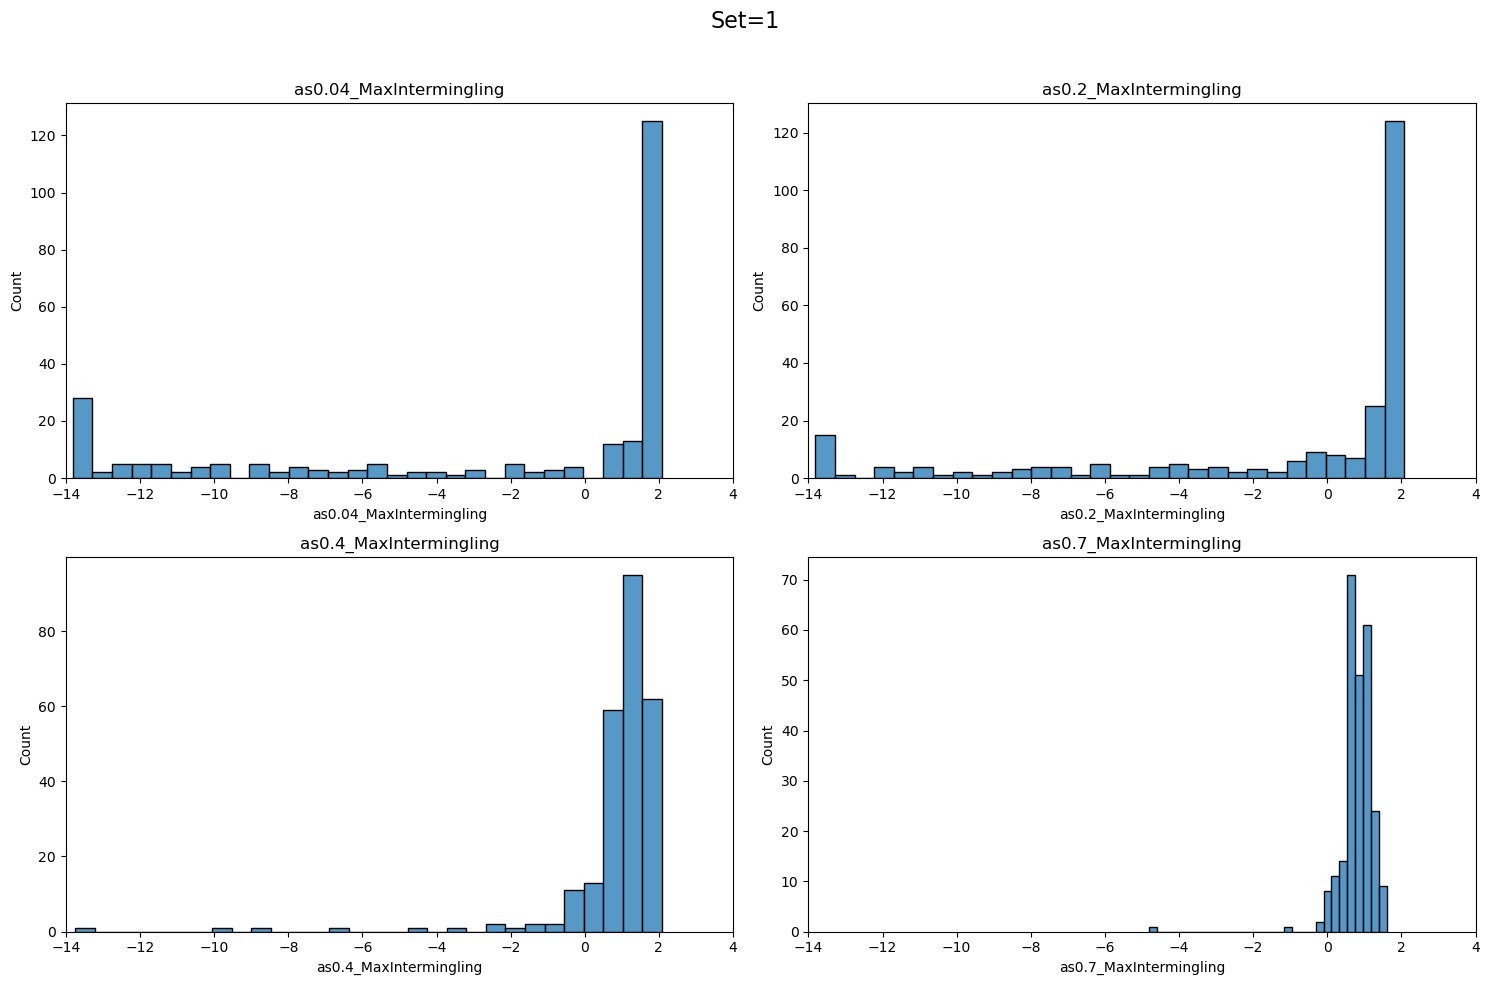

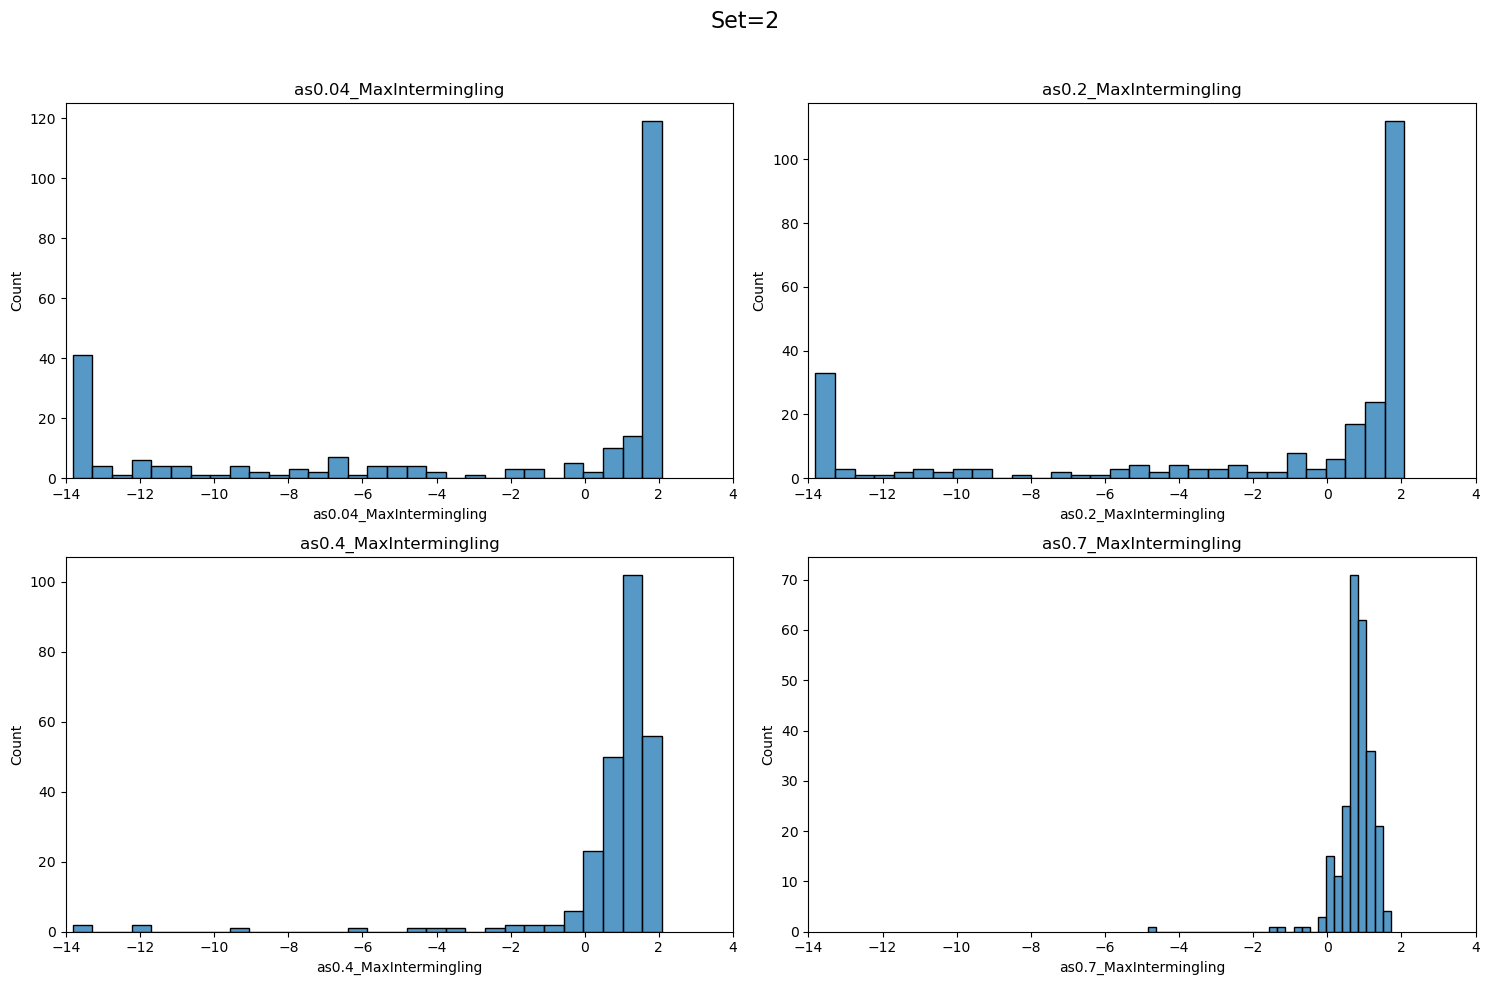

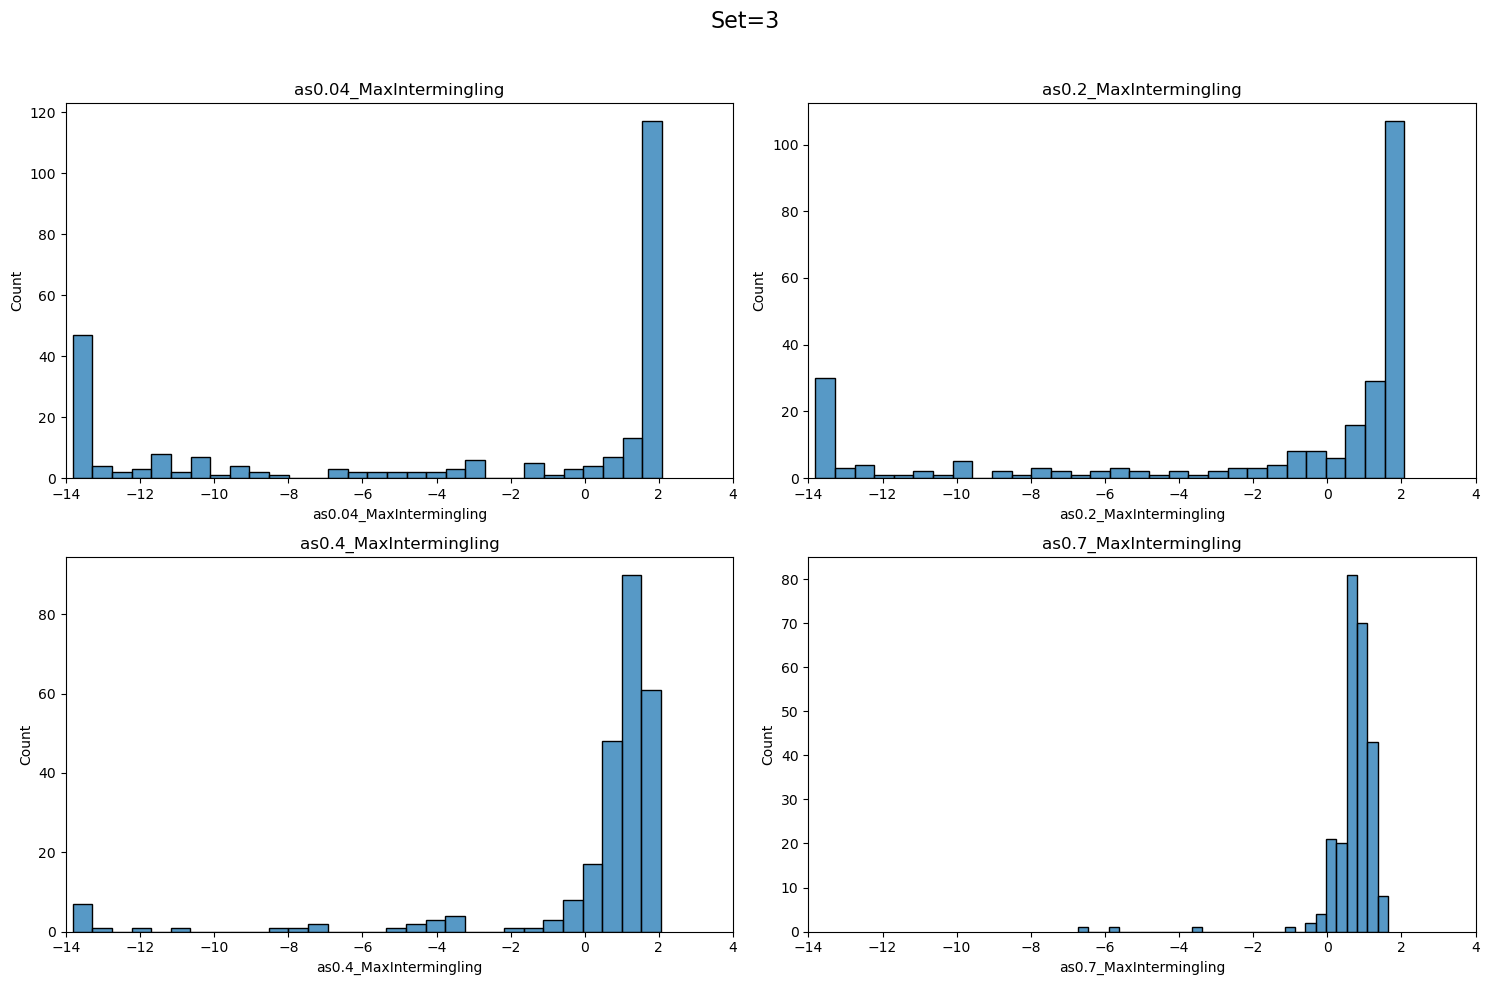

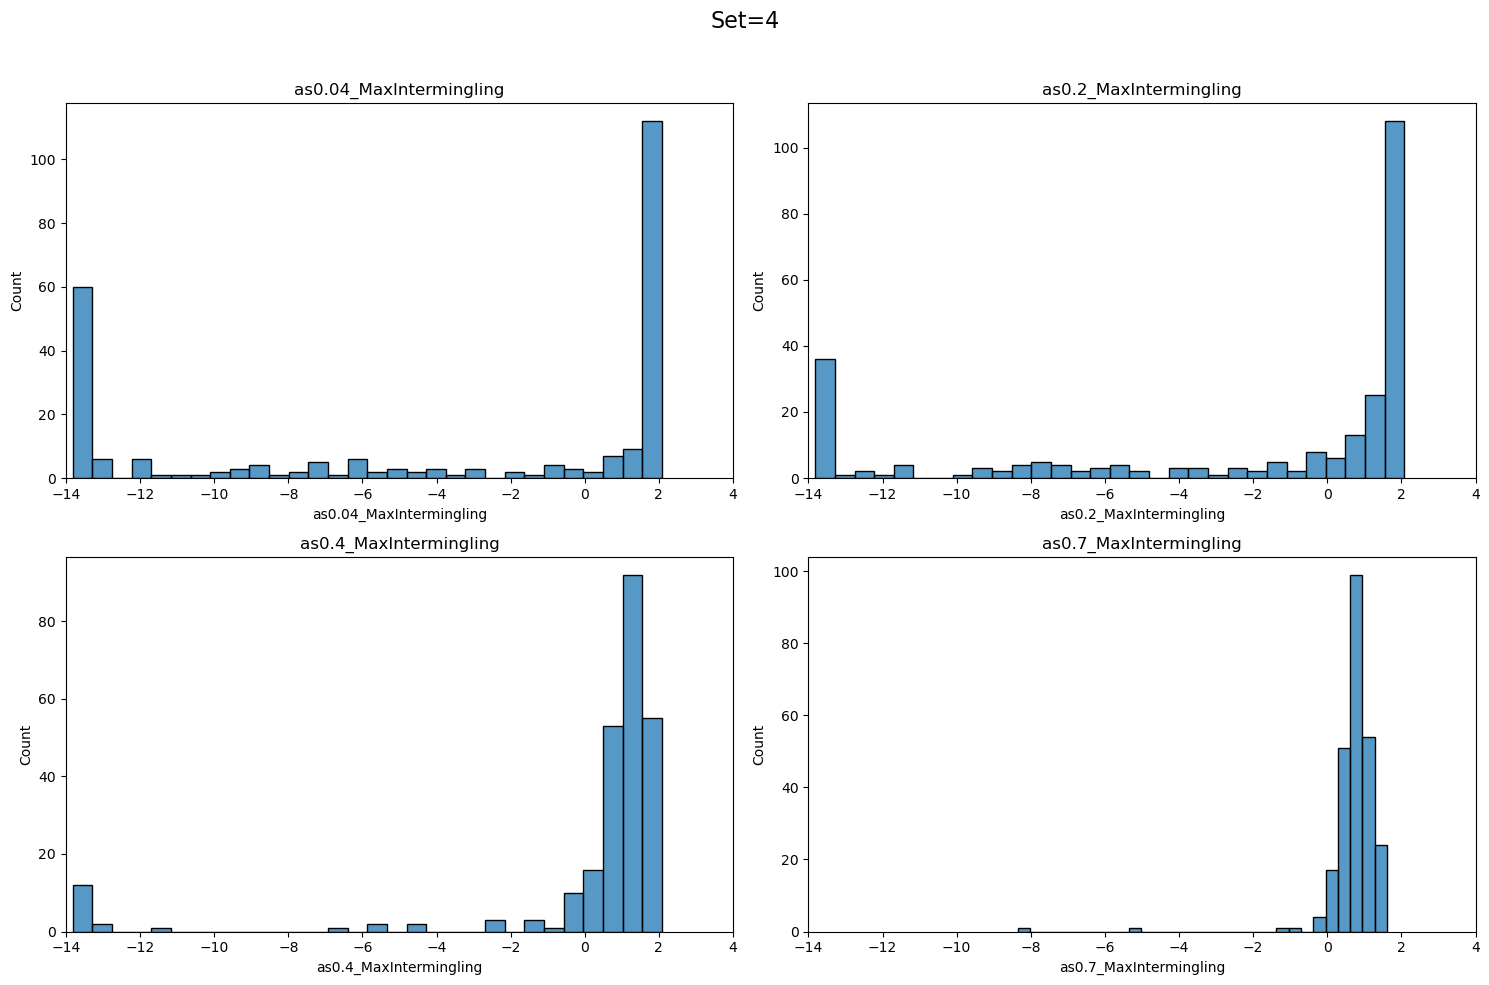

In [8]:
setlist = [1,2,3,4] #,5,6,7,8]
suffix="3"
pref="ell"
Tp=0.0001


avg_df = pd.DataFrame()

mode = "dediff"
stringcheck = "MaxIntermingling"
mainpath="//Data3/AnaCode_chromosome_modelling/prepSurf_perturb_merlin_geomell//"
for set in setlist:
    df = pd.read_csv('dediff_aggregate_IM_data_sga0.001_epa4.0_sgat2_set'+str(set)+'.csv')
    # df = pd.read_csv('dediff_aggregate_IM_data_sga0.001_epa6.00_sgat2_set'+str(set)+'.csv')
    # file = os.path.join(mainpath,"OutPS{set}_in{suffix}_Tp{Tp}","46ch_T0.0001_")
    # df = pd.read_csv()
    
    columns = [col for col in df.columns if stringcheck in col]
    n = int(len(columns) / 2)
    m = 2
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15, 5*n))
    fig.suptitle("Set=" + str(set), fontsize=16)
    
    for i, col in enumerate(columns):
        # print(df[col])
        ax = axes[i // m, i % m]
        sns.histplot(df[col], bins=30, ax=ax)
        ax.set_title(col)
        ax.set_xlim(-14,4)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    if avg_df.empty:
        avg_df = df.copy()
        avg_df[columns] = 0

    avg_df[columns] += df[columns]

avg_df[columns] /= len(setlist)


In [9]:
# Identify columns with 'targetIntermingling' in their name
target_inter_columns = [col for col in avg_df.columns if 'targetIntermingling' in col]

# Print NaNs in these columns
nan_rows = avg_df[target_inter_columns].isna()
print(avg_df[nan_rows.any(axis=1)])

Empty DataFrame
Columns: [Chrom1-id, Chrom2-id, InteractionStrength, Specific, as0.04_MeanIntermingling, as0.04_minReturnTime, as0.04_MaxIntermingling, as0.04_targetIntermingling, as0.2_MeanIntermingling, as0.2_minReturnTime, as0.2_MaxIntermingling, as0.2_targetIntermingling, as0.4_MeanIntermingling, as0.4_minReturnTime, as0.4_MaxIntermingling, as0.4_targetIntermingling, as0.7_MeanIntermingling, as0.7_minReturnTime, as0.7_MaxIntermingling, as0.7_targetIntermingling]
Index: []


In [10]:
def discretize_columns(df, column_suffix, n_bins, bin_edges=None):
    """
    Discretizes columns in the dataframe that start with "as" and have the same quantity after the "_".

    Parameters:
    - df: pd.DataFrame - The input dataframe
    - column_suffix: str - The suffix of the columns to be discretized (e.g., "ReturnTime")
    - n_bins: int - The number of bins to use for discretization

    Returns:
    - pd.DataFrame - The dataframe with discretized columns
    """
    # Identify columns to be discretized
    columns_to_discretize = [col for col in df.columns if col.endswith(column_suffix)]
    print(columns_to_discretize)
    # Discretize each column and create a new column with discretized scores
    for col in columns_to_discretize:
        new_col_name = f"{col}_discretized"
        if bin_edges is None:
            df[new_col_name] = pd.cut(df[col], bins=n_bins-1, labels=False, include_lowest=True).astype(int)
        else:
            df[new_col_name] = pd.cut(df[col], bins=bin_edges, labels=False, include_lowest=True).astype(int)
    return df

In [11]:
disc_df = IM_dms.discretize_columns(avg_df, "_targetIntermingling",
                                     4, [-15, -9,-2,4 ])

['as0.04_targetIntermingling', 'as0.2_targetIntermingling', 'as0.4_targetIntermingling', 'as0.7_targetIntermingling']


['as0.04_targetIntermingling_discretized', 'as0.2_targetIntermingling_discretized', 'as0.4_targetIntermingling_discretized', 'as0.7_targetIntermingling_discretized']


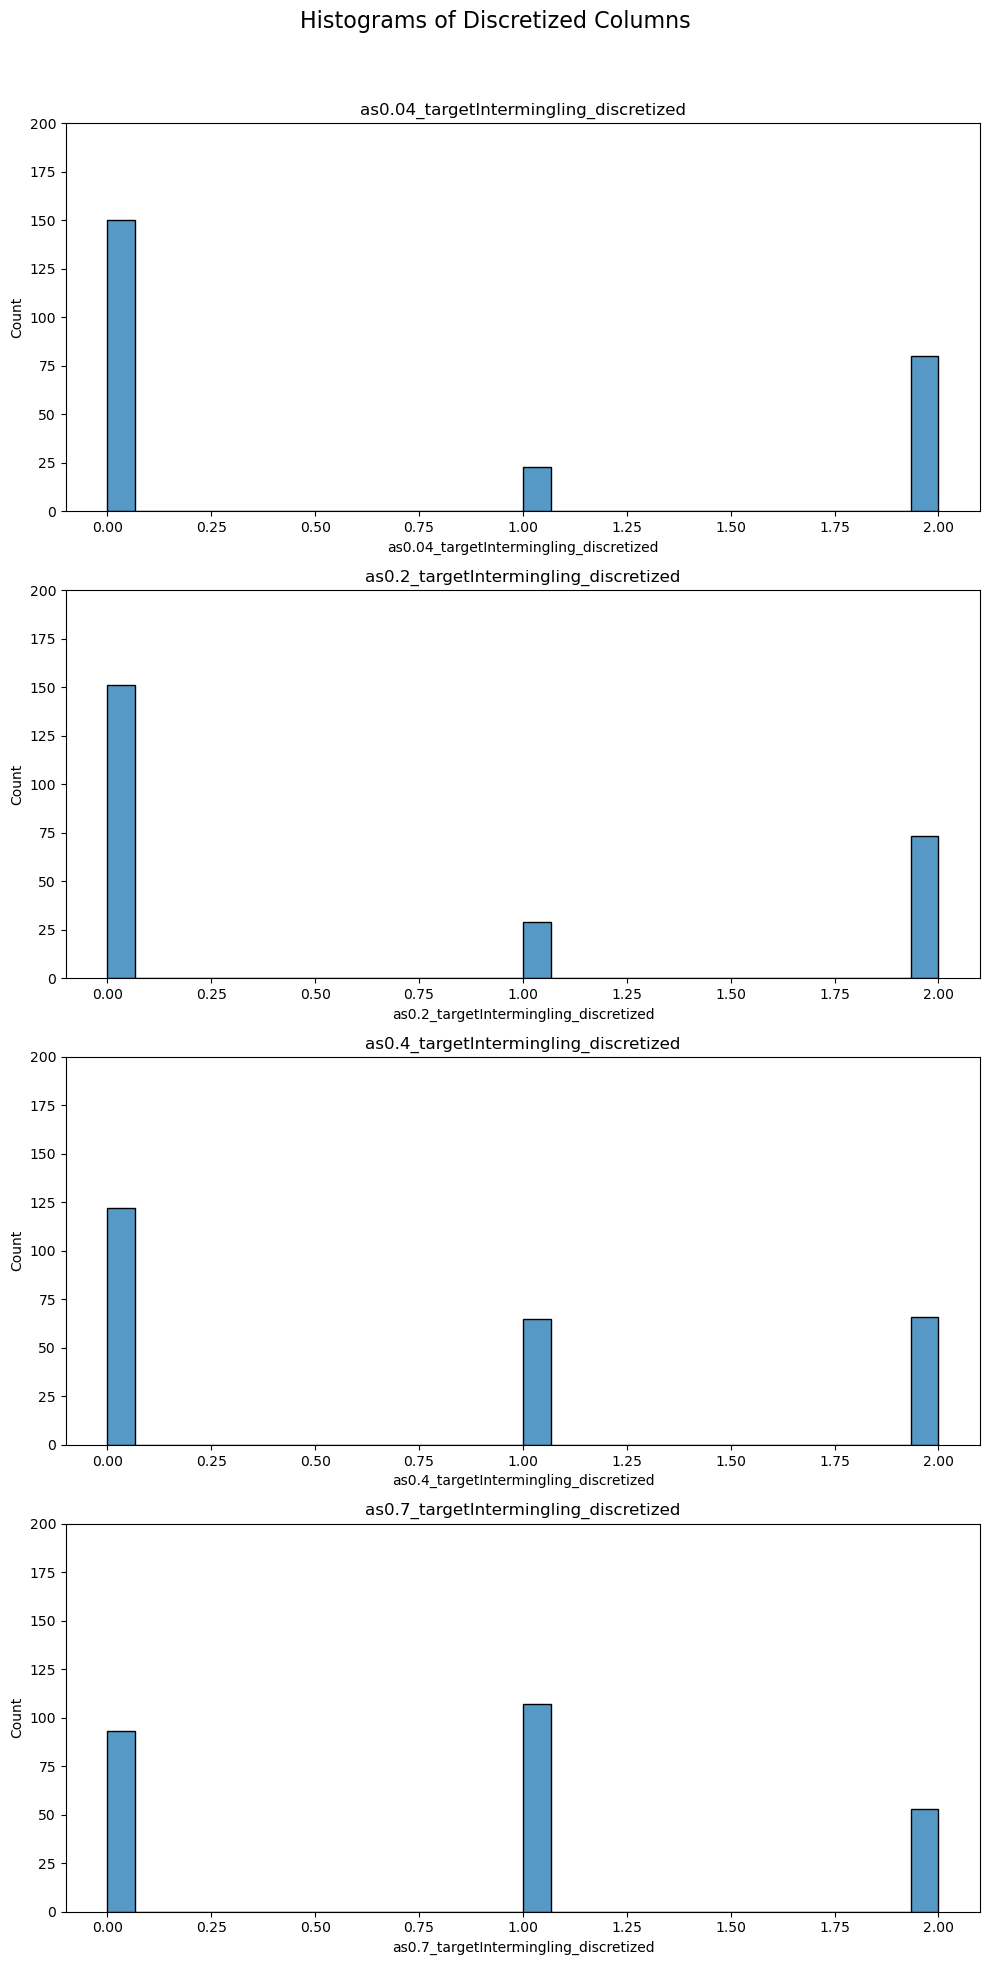

In [12]:
# Identify columns with '_targetIntermingling_discretized' in their name
discretized_columns = [col for col in avg_df.columns if '_targetIntermingling_discretized' in col]
print(discretized_columns)
# Plot histograms for each of these columns
fig, axes = plt.subplots(nrows=len(discretized_columns), ncols=1, figsize=(10, 5*len(discretized_columns)))
fig.suptitle("Histograms of Discretized Columns", fontsize=16)

for i, col in enumerate(discretized_columns):
    ax = axes[i]
    sns.histplot(avg_df[col], bins=30, ax=ax)
    ax.set_title(col)
    ax.set_ylim(0,200)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [13]:
print(avg_df.columns)

disc_df = IM_dms.discretize_columns(avg_df, "InteractionStrength",
                                     4, None)
print(avg_df.columns)

Index(['Chrom1-id', 'Chrom2-id', 'InteractionStrength', 'Specific',
       'as0.04_MeanIntermingling', 'as0.04_minReturnTime',
       'as0.04_MaxIntermingling', 'as0.04_targetIntermingling',
       'as0.2_MeanIntermingling', 'as0.2_minReturnTime',
       'as0.2_MaxIntermingling', 'as0.2_targetIntermingling',
       'as0.4_MeanIntermingling', 'as0.4_minReturnTime',
       'as0.4_MaxIntermingling', 'as0.4_targetIntermingling',
       'as0.7_MeanIntermingling', 'as0.7_minReturnTime',
       'as0.7_MaxIntermingling', 'as0.7_targetIntermingling',
       'as0.04_targetIntermingling_discretized',
       'as0.2_targetIntermingling_discretized',
       'as0.4_targetIntermingling_discretized',
       'as0.7_targetIntermingling_discretized'],
      dtype='object')
['InteractionStrength']
Index(['Chrom1-id', 'Chrom2-id', 'InteractionStrength', 'Specific',
       'as0.04_MeanIntermingling', 'as0.04_minReturnTime',
       'as0.04_MaxIntermingling', 'as0.04_targetIntermingling',
       'as0.2_MeanInt

{'as': ['$v_a$', 2], 'epa': ['$\\epsilon_{ij}$', 3], 'tl': ['sim length', 2]}
['as0.04', 'as0.2', 'as0.4', 'as0.7', 'as0.04', 'as0.2', 'as0.4', 'as0.7']
cols extract ['Chrom1-id', 'Chrom2-id', 'Specific', 'InteractionStrength', 'InteractionStrength_discretized', 'as0.04_MeanIntermingling', 'as0.04_minReturnTime', 'as0.04_MaxIntermingling', 'as0.04_targetIntermingling', 'as0.04_targetIntermingling_discretized']
as0.04_targetIntermingling_discretized InteractionStrength_discretized ['as0.04', 'targetIntermingling', 'discretized'] ['InteractionStrength', 'discretized']
['targetIntermingling-1-low,InteractionStrength-1-low', 'targetIntermingling-1-low,InteractionStrength-2-medium', 'targetIntermingling-1-low,InteractionStrength-3-high', 'targetIntermingling-2-medium,InteractionStrength-1-low', 'targetIntermingling-2-medium,InteractionStrength-2-medium', 'targetIntermingling-2-medium,InteractionStrength-3-high', 'targetIntermingling-3-high,InteractionStrength-1-low', 'targetIntermingling-3-

/home/goswam_y/Dropbox/chromosome_modelling/AnaCode_chrom_model_OOP/ChromUtils/IMLib/discretize_make_sets.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sets_info'] = pd.Categorical(np.array(sets_list), categories=possible_sets, ordered=False)


$v_a$:0.04


/home/goswam_y/Dropbox/chromosome_modelling/AnaCode_chrom_model_OOP/ChromUtils/IMLib/create_plots.py:225: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


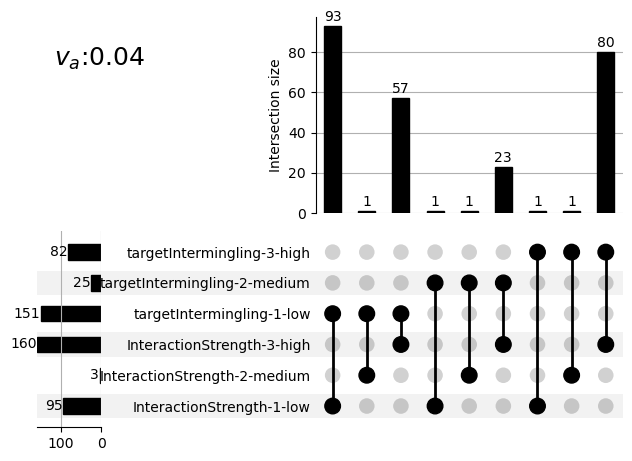

In [14]:
annot_dict={'as': [f'$v_a$',2],
            'epa':[f'$\epsilon_{{ij}}$',3],
            'tl':[f'sim length',2]}
print(annot_dict)
vastr = [col.split('_')[0] for col in avg_df.columns if 'targetIntermingling' in col]
print(vastr)
IM_cp.generate_upset_plot_w_prefix(avg_df, annot_dict,vastr[0],
                             "_targetIntermingling_discretized",
                             "InteractionStrength_discretized",nbins=4)

cols extract ['Chrom1-id', 'Chrom2-id', 'Specific', 'InteractionStrength', 'InteractionStrength_discretized', 'as0.2_MeanIntermingling', 'as0.2_minReturnTime', 'as0.2_MaxIntermingling', 'as0.2_targetIntermingling', 'as0.2_targetIntermingling_discretized']
as0.2_targetIntermingling_discretized InteractionStrength_discretized ['as0.2', 'targetIntermingling', 'discretized'] ['InteractionStrength', 'discretized']
['targetIntermingling-1-low,InteractionStrength-1-low', 'targetIntermingling-1-low,InteractionStrength-2-medium', 'targetIntermingling-1-low,InteractionStrength-3-high', 'targetIntermingling-2-medium,InteractionStrength-1-low', 'targetIntermingling-2-medium,InteractionStrength-2-medium', 'targetIntermingling-2-medium,InteractionStrength-3-high', 'targetIntermingling-3-high,InteractionStrength-1-low', 'targetIntermingling-3-high,InteractionStrength-2-medium', 'targetIntermingling-3-high,InteractionStrength-3-high']
col lengths 253 253
sets list 253
Index(['Chrom1-id', 'Chrom2-id', 

/home/goswam_y/Dropbox/chromosome_modelling/AnaCode_chrom_model_OOP/ChromUtils/IMLib/discretize_make_sets.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sets_info'] = pd.Categorical(np.array(sets_list), categories=possible_sets, ordered=False)


$v_a$:0.2


/home/goswam_y/Dropbox/chromosome_modelling/AnaCode_chrom_model_OOP/ChromUtils/IMLib/create_plots.py:225: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


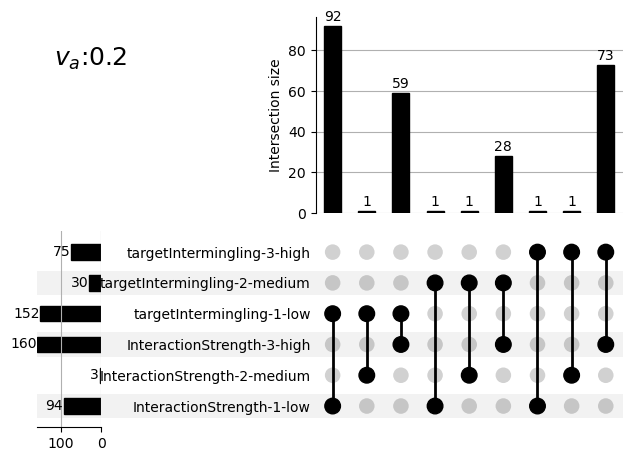

In [15]:
IM_cp.generate_upset_plot_w_prefix(avg_df,annot_dict, vastr[1],
                             "_targetIntermingling_discretized",
                             "InteractionStrength_discretized",nbins=4)

cols extract ['Chrom1-id', 'Chrom2-id', 'Specific', 'InteractionStrength', 'InteractionStrength_discretized', 'as0.4_MeanIntermingling', 'as0.4_minReturnTime', 'as0.4_MaxIntermingling', 'as0.4_targetIntermingling', 'as0.4_targetIntermingling_discretized']
as0.4_targetIntermingling_discretized InteractionStrength_discretized ['as0.4', 'targetIntermingling', 'discretized'] ['InteractionStrength', 'discretized']
['targetIntermingling-1-low,InteractionStrength-1-low', 'targetIntermingling-1-low,InteractionStrength-2-medium', 'targetIntermingling-1-low,InteractionStrength-3-high', 'targetIntermingling-2-medium,InteractionStrength-1-low', 'targetIntermingling-2-medium,InteractionStrength-2-medium', 'targetIntermingling-2-medium,InteractionStrength-3-high', 'targetIntermingling-3-high,InteractionStrength-1-low', 'targetIntermingling-3-high,InteractionStrength-2-medium', 'targetIntermingling-3-high,InteractionStrength-3-high']
col lengths 253 253
sets list 253
Index(['Chrom1-id', 'Chrom2-id', 

/home/goswam_y/Dropbox/chromosome_modelling/AnaCode_chrom_model_OOP/ChromUtils/IMLib/discretize_make_sets.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sets_info'] = pd.Categorical(np.array(sets_list), categories=possible_sets, ordered=False)
/home/goswam_y/Dropbox/chromosome_modelling/AnaCode_chrom_model_OOP/ChromUtils/IMLib/create_plots.py:225: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


$v_a$:0.4


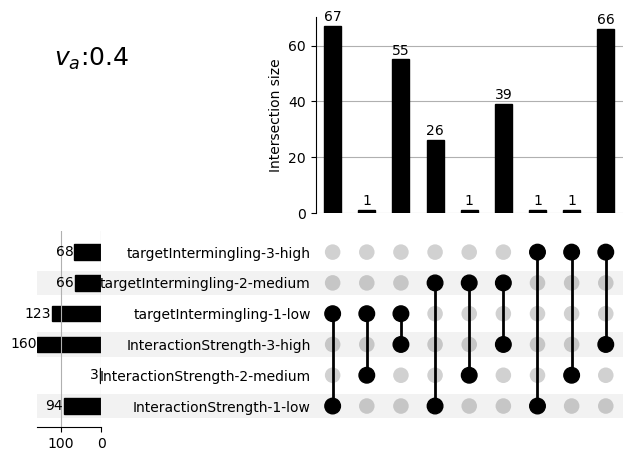

In [16]:
IM_cp.generate_upset_plot_w_prefix(avg_df,annot_dict, vastr[2],
                             "_targetIntermingling_discretized",
                             "InteractionStrength_discretized",nbins=4)

cols extract ['Chrom1-id', 'Chrom2-id', 'Specific', 'InteractionStrength', 'InteractionStrength_discretized', 'as0.7_MeanIntermingling', 'as0.7_minReturnTime', 'as0.7_MaxIntermingling', 'as0.7_targetIntermingling', 'as0.7_targetIntermingling_discretized']
as0.7_targetIntermingling_discretized InteractionStrength_discretized ['as0.7', 'targetIntermingling', 'discretized'] ['InteractionStrength', 'discretized']
['targetIntermingling-1-low,InteractionStrength-1-low', 'targetIntermingling-1-low,InteractionStrength-2-medium', 'targetIntermingling-1-low,InteractionStrength-3-high', 'targetIntermingling-2-medium,InteractionStrength-1-low', 'targetIntermingling-2-medium,InteractionStrength-2-medium', 'targetIntermingling-2-medium,InteractionStrength-3-high', 'targetIntermingling-3-high,InteractionStrength-1-low', 'targetIntermingling-3-high,InteractionStrength-2-medium', 'targetIntermingling-3-high,InteractionStrength-3-high']
col lengths 253 253
sets list 253
Index(['Chrom1-id', 'Chrom2-id', 

/home/goswam_y/Dropbox/chromosome_modelling/AnaCode_chrom_model_OOP/ChromUtils/IMLib/discretize_make_sets.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sets_info'] = pd.Categorical(np.array(sets_list), categories=possible_sets, ordered=False)
/home/goswam_y/Dropbox/chromosome_modelling/AnaCode_chrom_model_OOP/ChromUtils/IMLib/create_plots.py:225: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


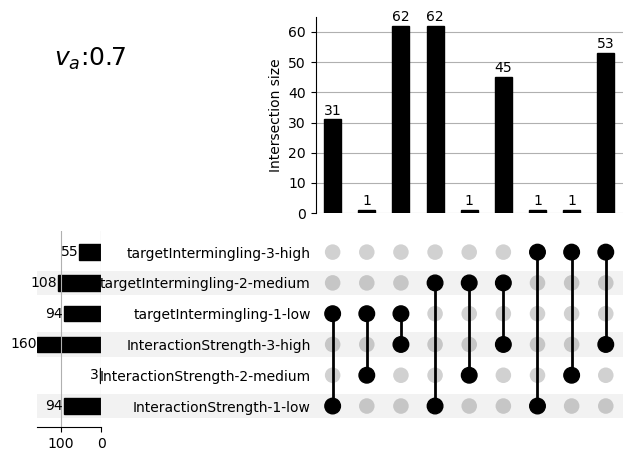

In [17]:
IM_cp.generate_upset_plot_w_prefix(avg_df,annot_dict, vastr[3],
                             "_targetIntermingling_discretized",
                             "InteractionStrength_discretized",nbins=4)

['as0.04', 'as0.2', 'as0.4', 'as0.7', 'as0.04', 'as0.2', 'as0.4', 'as0.7']
cols extract ['Chrom1-id', 'Chrom2-id', 'Specific', 'InteractionStrength', 'InteractionStrength_discretized', 'as0.7_MeanIntermingling', 'as0.7_minReturnTime', 'as0.7_MaxIntermingling', 'as0.7_targetIntermingling', 'as0.7_targetIntermingling_discretized']
as0.7_targetIntermingling_discretized InteractionStrength_discretized ['as0.7', 'targetIntermingling', 'discretized'] ['InteractionStrength', 'discretized']
['targetIntermingling-1,InteractionStrength-1', 'targetIntermingling-1,InteractionStrength-2', 'targetIntermingling-1,InteractionStrength-3', 'targetIntermingling-2,InteractionStrength-1', 'targetIntermingling-2,InteractionStrength-2', 'targetIntermingling-2,InteractionStrength-3', 'targetIntermingling-3,InteractionStrength-1', 'targetIntermingling-3,InteractionStrength-2', 'targetIntermingling-3,InteractionStrength-3']
col lengths 253 253
sets list 253
Index(['Chrom1-id', 'Chrom2-id', 'Specific', 'Interact

/tmp/ipykernel_407190/2247180068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sets_info'] = pd.Categorical(np.array(sets_list),


here cva as0.7
$v_a$:0.7


/tmp/ipykernel_407190/2247180068.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


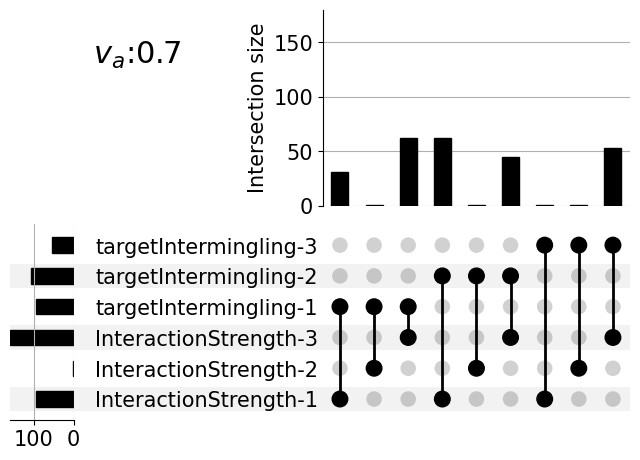

In [28]:
import upsetplot
from upsetplot import from_memberships
import matplotlib as mpl
mpl.rcParams.update({'font.size': 15})

def create_sets_info(df, col1, col2, nbins=4):
    if nbins == 4:
        string_scale = ["1", "2", "3"]
    elif nbins == 6:
        string_scale = ["1", "2", "3", "4", "5"]
    else:
        print("bad nbins value")
        return None

    print(col1, col2, col1.split('_'), col2.split('_'))
    # in this version, col2 always has the form "InteractionStrength_discretized"
    possible_sets = [col1.split('_')[1] + "-" + string_scale[i] + "," + col2.split('_')[0] + "-" + string_scale[j] for i in range(nbins-1) for j in range(nbins-1)]
    
    print(possible_sets)
    print("col lengths", len(df[col1].values), len(df[col2].values))
    if col1 not in df.columns or col2 not in df.columns:
        print(f"Columns in df: {df.columns}")
        return None

    sets_list = [col1.split('_')[1] + "-" + string_scale[df[col1].values[i]] + "," + col2.split('_')[0] + "-" + string_scale[df[col2].values[i]]
                 for i in range(len(df[col1].values))]
    print("sets list", len(sets_list))
    df['sets_info'] = pd.Categorical(np.array(sets_list),
                                      categories=sorted(possible_sets,
                                                        key=lambda x: (x.split("-")[1] == "1", x.split("-")[1] == "3", x.split("-")[1] == "2")),
                                                           ordered=True)
    
    for pset in possible_sets:
        if pset not in sets_list:
            new_row = {col1.split('_')[1]: np.nan, col2.split('_')[0]: np.nan, 'sets_info': pset}
            df = df._append(new_row, ignore_index=True)
            
    # Split 'sets_info' by "," and then by "-"
    split_sets = df['sets_info'].str.split(",", expand=True)
    split_sets = split_sets.applymap(lambda x: x.split("-")[1] if x else None)

    # Map "1", "3", "2" to [1, 2, 3]
    mapping = {"1": 1, "2": 2, "3": 3}
    split_sets = split_sets.applymap(lambda x: mapping[x] if x in mapping else None)

    # Add sorting columns to the dataframe
    df['sort_col1'] = split_sets[0]
    df['sort_col2'] = split_sets[1]

    # Sort the dataframe by the mapped values in reverse order
    df.sort_values(by=['sort_col1', 'sort_col2'], ascending=False, inplace=True)

    # Drop the sorting columns after sorting
    df.drop(columns=['sort_col1', 'sort_col2'], inplace=True)

    df.reset_index(drop=True, inplace=True)
    
    return df, possible_sets

def generate_upset_plot_w_prefix(df, annot_dict, cva_list, 
                                 col_prefix1, col_prefix2, nbins=4):
    columns_to_extract = ["Chrom1-id", "Chrom2-id", "Specific", "InteractionStrength", "InteractionStrength_discretized"] + [col for col in df.columns if cva_list[0] in col]
    
    print("cols extract", columns_to_extract)
    new_df = df[columns_to_extract]
    new_sets_df, possible_sets = create_sets_info(new_df, cva_list[0] + col_prefix1, col_prefix2, nbins=nbins)

    print(new_sets_df.columns)
    print(new_sets_df.sets_info)
    up_df_by_set = from_memberships(new_sets_df.sets_info.str.split(","), data=new_sets_df)

    upset = upsetplot.UpSet(
        up_df_by_set,
        show_counts=False,
        sort_categories_by=None,  # Maintain the order of appearance
        include_empty_subsets=False,
  # Increase label font size for intersection labels
    )
    upset.plot()

    import matplotlib.pyplot as plt
    plt.ylim(0, 180)

    y_offset = 0.85  # Initial vertical position for annotations

    for cva in cva_list:
        print("here cva", cva)
        for key, value in annot_dict.items():
            l = value[1]
            if cva[:l] == key:
                strpt1 = value[0]
                strpt2 = cva[l:]
                if float(strpt2) > 1000:
                    strpt2 = str(int(float(strpt2) * 0.35 * 0.001)) + 's'
                break
        print(strpt1 + ':' + strpt2)
        plt.annotate(strpt1 + ':' + strpt2, xy=(-0.75, y_offset), xycoords='axes fraction', fontsize=22, verticalalignment='top')
        y_offset -= 0.1  # Adjust vertical position for the next annotation

    plt.tight_layout()

    # Set all tick labels and axis labels to fontsize 15
    ax = plt.gca()
    ax.tick_params(axis='both', labelsize=15)
    ax.xaxis.label.set_size(15)
    ax.yaxis.label.set_size(15)

    # Set occupation axis ticklabels fontsize
    for label in ax.get_yticklabels():
        label.set_fontsize(15)

    # Set subset/class names fontsize
    for label in ax.get_xticklabels():
        label.set_fontsize(15)

    plt.savefig(f'upset_plot_{cva_list[0]}{col_prefix1}_{col_prefix2}_nbins{nbins}.png', dpi=300)


annot_dict = {
    'as': [r'$v_a$', 2],
    'epa': [r'$\epsilon_{{ij}}$', 3],
    'tl': [r'$t_{\mathrm{tot}}$', 2]
}


vastr = [col.split('_')[0] for col in avg_df.columns if 'targetIntermingling' in col]
print(vastr)
eijstr = ["epa"]
# generate_upset_plot_w_prefix(avg_df,annot_dict,[vastr[3],eijstr],
#                              "_targetIntermingling_discretized",
#                              "InteractionStrength_discretized",nbins=4)
generate_upset_plot_w_prefix(avg_df,annot_dict, [vastr[3]],
                             "_targetIntermingling_discretized",
                             "InteractionStrength_discretized",nbins=4)

['InteractionStrength']
Index(['Chrom1-id', 'Chrom2-id', 'InteractionStrength', 'Specific',
       'as0.04_MeanIntermingling', 'as0.04_minReturnTime',
       'as0.04_MaxIntermingling', 'as0.04_targetIntermingling',
       'as0.2_MeanIntermingling', 'as0.2_minReturnTime',
       'as0.2_MaxIntermingling', 'as0.2_targetIntermingling',
       'as0.4_MeanIntermingling', 'as0.4_minReturnTime',
       'as0.4_MaxIntermingling', 'as0.4_targetIntermingling',
       'as0.7_MeanIntermingling', 'as0.7_minReturnTime',
       'as0.7_MaxIntermingling', 'as0.7_targetIntermingling',
       'as0.04_targetIntermingling_discretized',
       'as0.2_targetIntermingling_discretized',
       'as0.4_targetIntermingling_discretized',
       'as0.7_targetIntermingling_discretized',
       'InteractionStrength_discretized'],
      dtype='object')
['as0.04', 'as0.2', 'as0.4', 'as0.7']
cols extract ['Chrom1-id', 'Chrom2-id', 'Specific', 'InteractionStrength', 'InteractionStrength_discretized', 'as0.7_MeanIntermingli

/tmp/ipykernel_407190/2247180068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sets_info'] = pd.Categorical(np.array(sets_list),


here cva as0.7
$v_a$:0.7


/tmp/ipykernel_407190/2247180068.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


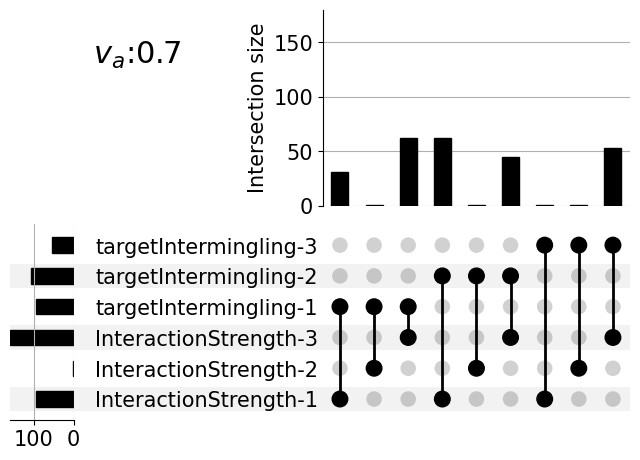

In [29]:
disc_df = IM_dms.discretize_columns(avg_df, "InteractionStrength",
                                     4, None)
# disc_df = IM_dms.discretize_columns(avg_df, "_MaxIntermingling",
#                                      4, [-15, -9,-2,4 ])

print(avg_df.columns)

vastr = [col.split('_')[0] for col in avg_df.columns if 'MaxIntermingling' in col]
print(vastr)
eijstr = ["epa"]
generate_upset_plot_w_prefix(avg_df,annot_dict,[vastr[3]],
                             "_targetIntermingling_discretized",
                             "InteractionStrength_discretized",nbins=4)
# generate_upset_plot_w_prefix(avg_df,annot_dict, [vastr[3]],
#                              "_MaxIntermingling_discretized",
#                              "InteractionStrength_discretized",nbins=4)

cols extract ['Chrom1-id', 'Chrom2-id', 'Specific', 'InteractionStrength', 'InteractionStrength_discretized', 'as0.04_MeanIntermingling', 'as0.04_minReturnTime', 'as0.04_MaxIntermingling', 'as0.04_targetIntermingling', 'as0.04_targetIntermingling_discretized']
as0.04_targetIntermingling_discretized InteractionStrength_discretized ['as0.04', 'targetIntermingling', 'discretized'] ['InteractionStrength', 'discretized']
['targetIntermingling-1,InteractionStrength-1', 'targetIntermingling-1,InteractionStrength-2', 'targetIntermingling-1,InteractionStrength-3', 'targetIntermingling-2,InteractionStrength-1', 'targetIntermingling-2,InteractionStrength-2', 'targetIntermingling-2,InteractionStrength-3', 'targetIntermingling-3,InteractionStrength-1', 'targetIntermingling-3,InteractionStrength-2', 'targetIntermingling-3,InteractionStrength-3']
col lengths 253 253
sets list 253
Index(['Chrom1-id', 'Chrom2-id', 'Specific', 'InteractionStrength',
       'InteractionStrength_discretized', 'as0.04_Mean

/tmp/ipykernel_407190/2247180068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sets_info'] = pd.Categorical(np.array(sets_list),
/tmp/ipykernel_407190/2247180068.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


here cva as0.04
$v_a$:0.04


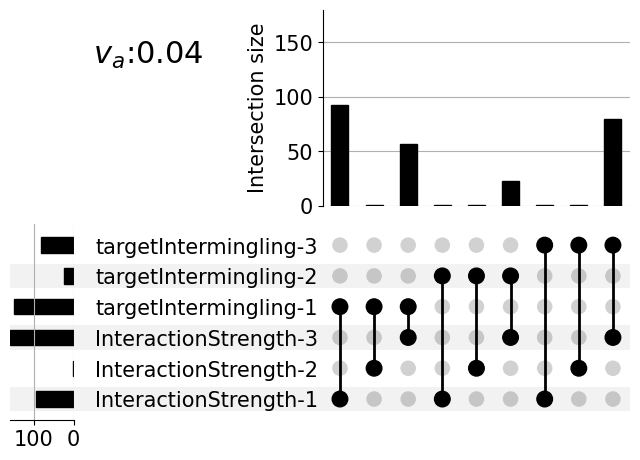

In [30]:
generate_upset_plot_w_prefix(avg_df,annot_dict,[vastr[0]],
                             "_targetIntermingling_discretized",
                             "InteractionStrength_discretized",nbins=4)

cols extract ['Chrom1-id', 'Chrom2-id', 'Specific', 'InteractionStrength', 'InteractionStrength_discretized', 'as0.2_MeanIntermingling', 'as0.2_minReturnTime', 'as0.2_MaxIntermingling', 'as0.2_targetIntermingling', 'as0.2_targetIntermingling_discretized']
as0.2_targetIntermingling_discretized InteractionStrength_discretized ['as0.2', 'targetIntermingling', 'discretized'] ['InteractionStrength', 'discretized']
['targetIntermingling-1,InteractionStrength-1', 'targetIntermingling-1,InteractionStrength-2', 'targetIntermingling-1,InteractionStrength-3', 'targetIntermingling-2,InteractionStrength-1', 'targetIntermingling-2,InteractionStrength-2', 'targetIntermingling-2,InteractionStrength-3', 'targetIntermingling-3,InteractionStrength-1', 'targetIntermingling-3,InteractionStrength-2', 'targetIntermingling-3,InteractionStrength-3']
col lengths 253 253
sets list 253
Index(['Chrom1-id', 'Chrom2-id', 'Specific', 'InteractionStrength',
       'InteractionStrength_discretized', 'as0.2_MeanIntermin

/tmp/ipykernel_407190/2247180068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sets_info'] = pd.Categorical(np.array(sets_list),
/tmp/ipykernel_407190/2247180068.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


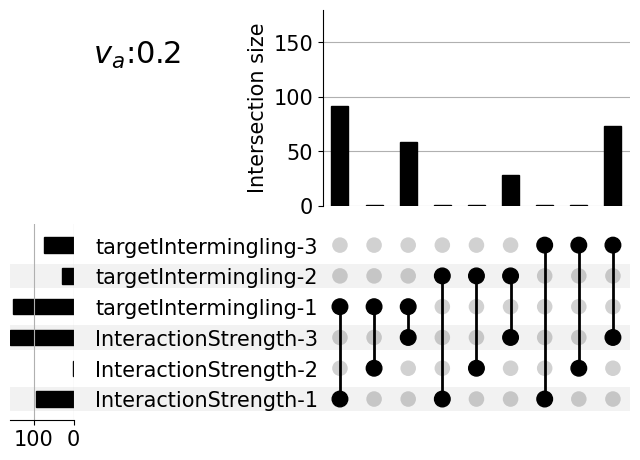

In [31]:
generate_upset_plot_w_prefix(avg_df,annot_dict,[vastr[1]],
                             "_targetIntermingling_discretized",
                             "InteractionStrength_discretized",nbins=4)

cols extract ['Chrom1-id', 'Chrom2-id', 'Specific', 'InteractionStrength', 'InteractionStrength_discretized', 'as0.4_MeanIntermingling', 'as0.4_minReturnTime', 'as0.4_MaxIntermingling', 'as0.4_targetIntermingling', 'as0.4_targetIntermingling_discretized']
as0.4_targetIntermingling_discretized InteractionStrength_discretized ['as0.4', 'targetIntermingling', 'discretized'] ['InteractionStrength', 'discretized']
['targetIntermingling-1,InteractionStrength-1', 'targetIntermingling-1,InteractionStrength-2', 'targetIntermingling-1,InteractionStrength-3', 'targetIntermingling-2,InteractionStrength-1', 'targetIntermingling-2,InteractionStrength-2', 'targetIntermingling-2,InteractionStrength-3', 'targetIntermingling-3,InteractionStrength-1', 'targetIntermingling-3,InteractionStrength-2', 'targetIntermingling-3,InteractionStrength-3']
col lengths 253 253
sets list 253
Index(['Chrom1-id', 'Chrom2-id', 'Specific', 'InteractionStrength',
       'InteractionStrength_discretized', 'as0.4_MeanIntermin

/tmp/ipykernel_407190/2247180068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sets_info'] = pd.Categorical(np.array(sets_list),


here cva as0.4
$v_a$:0.4


/tmp/ipykernel_407190/2247180068.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


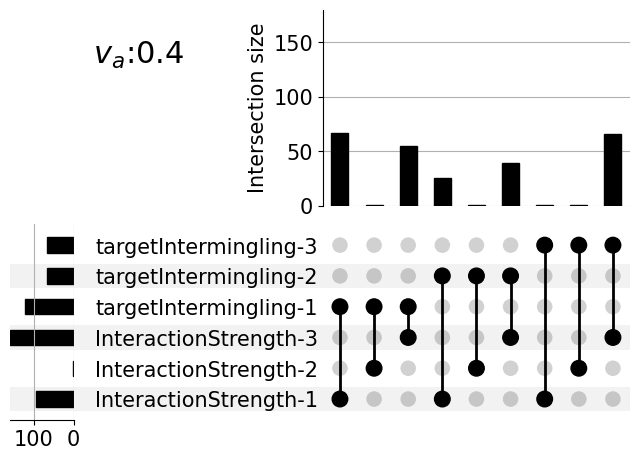

In [32]:
generate_upset_plot_w_prefix(avg_df,annot_dict,[vastr[2]],
                             "_targetIntermingling_discretized",
                             "InteractionStrength_discretized",nbins=4)

['tl400000_targetIntermingling', 'tl1000000_targetIntermingling', 'tl5000000_targetIntermingling']


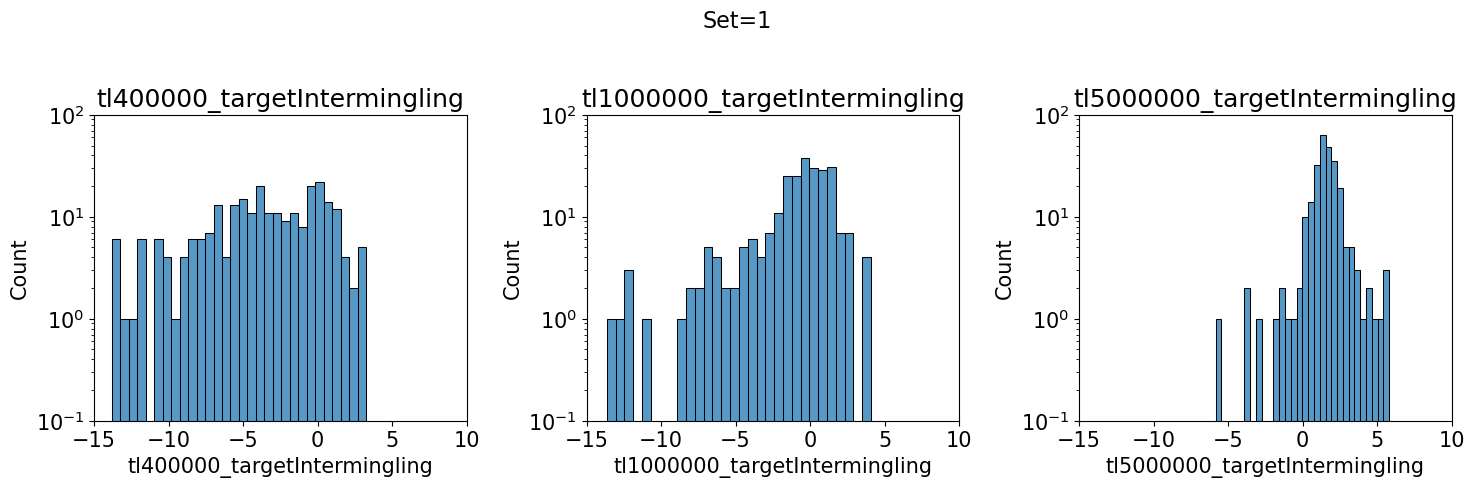

['tl400000_targetIntermingling', 'tl1000000_targetIntermingling', 'tl5000000_targetIntermingling']


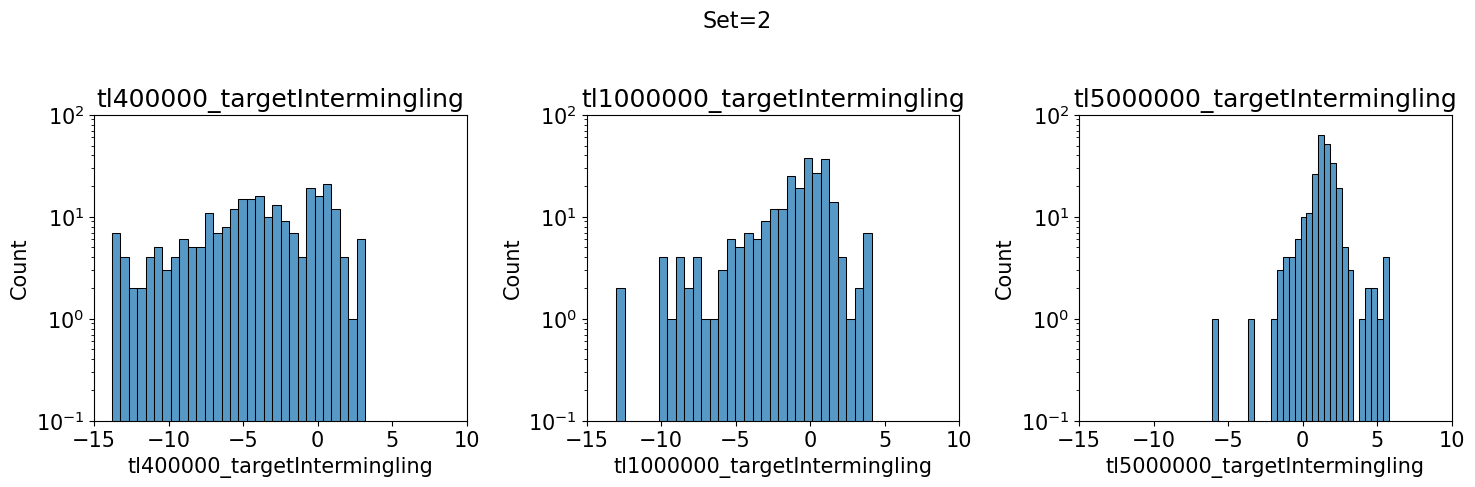

['tl400000_targetIntermingling', 'tl1000000_targetIntermingling', 'tl5000000_targetIntermingling']


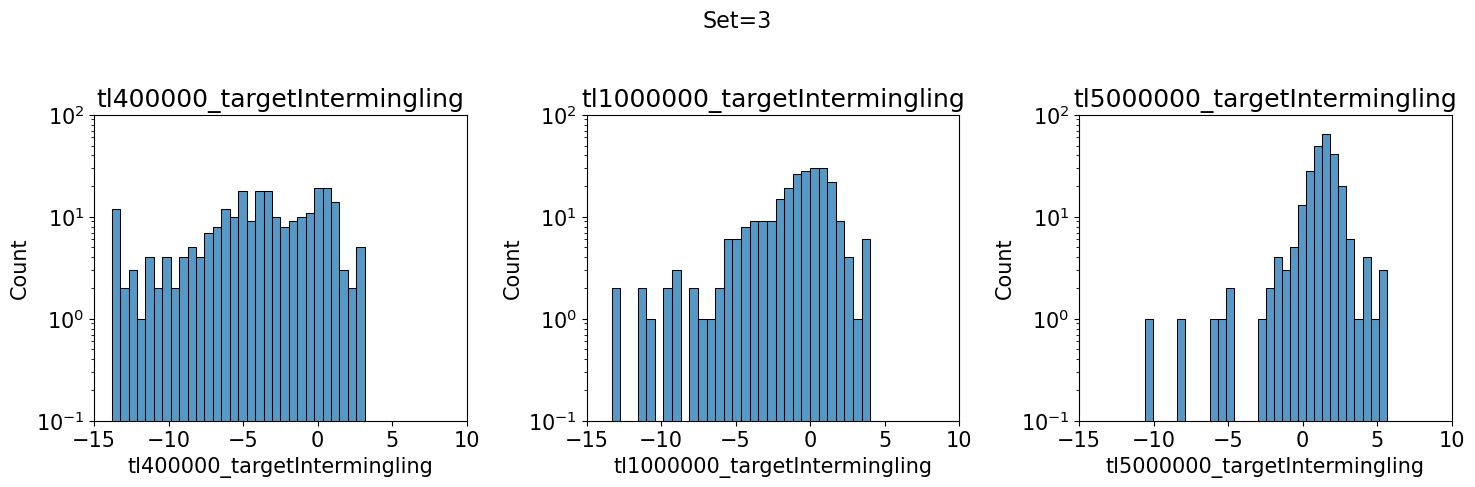

['tl400000_targetIntermingling', 'tl1000000_targetIntermingling', 'tl5000000_targetIntermingling']


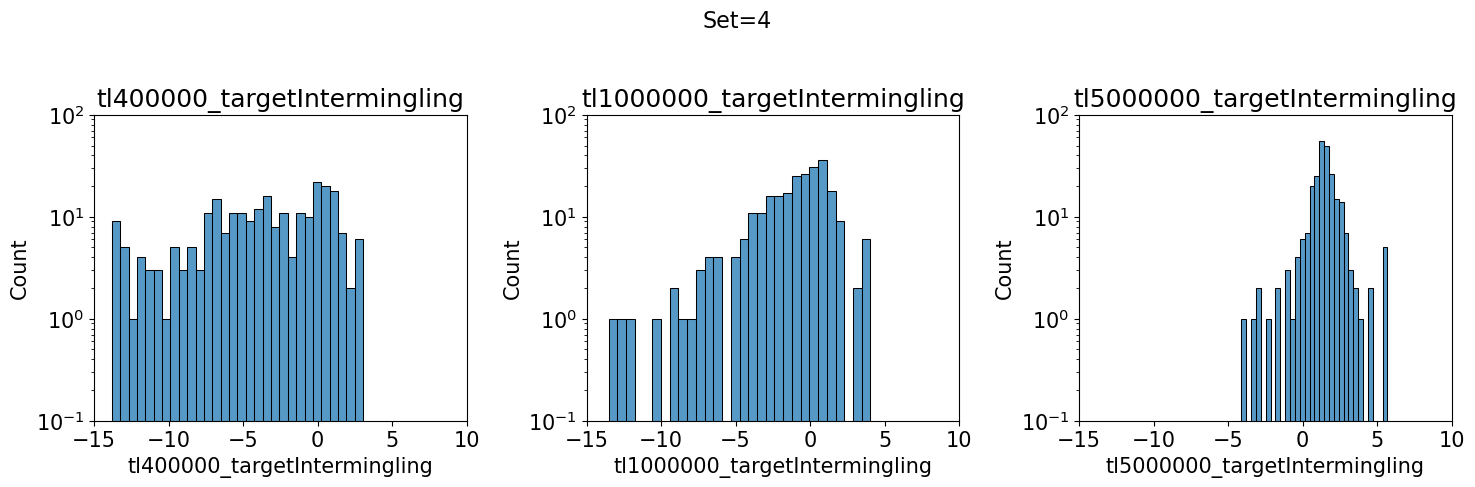

['tl400000_targetIntermingling', 'tl1000000_targetIntermingling', 'tl5000000_targetIntermingling']


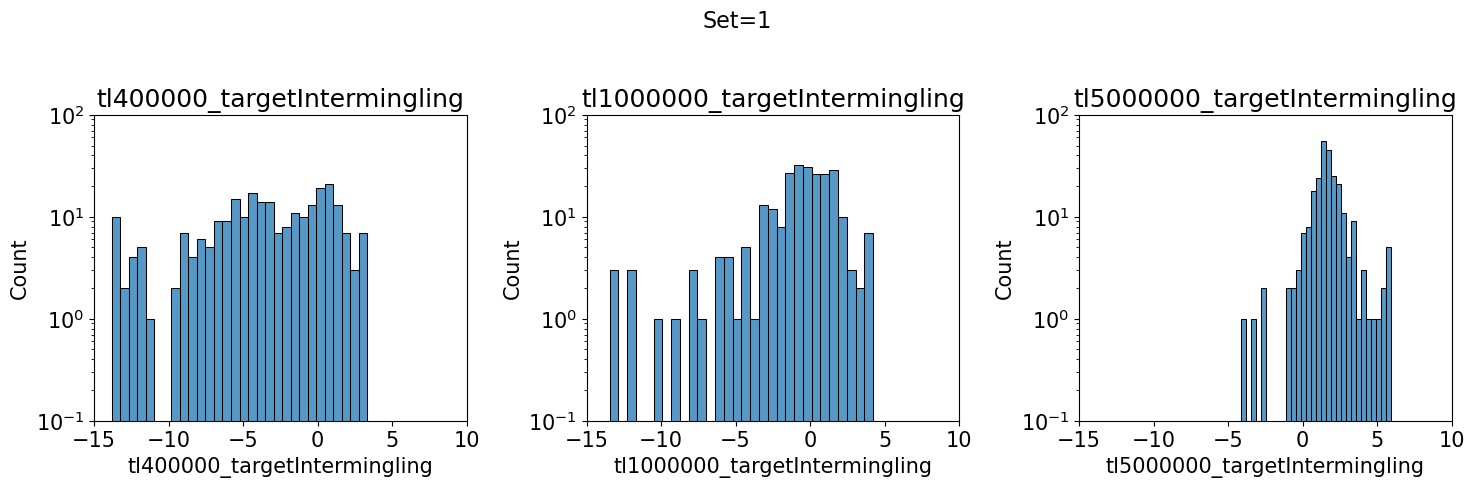

['tl400000_targetIntermingling', 'tl1000000_targetIntermingling', 'tl5000000_targetIntermingling']


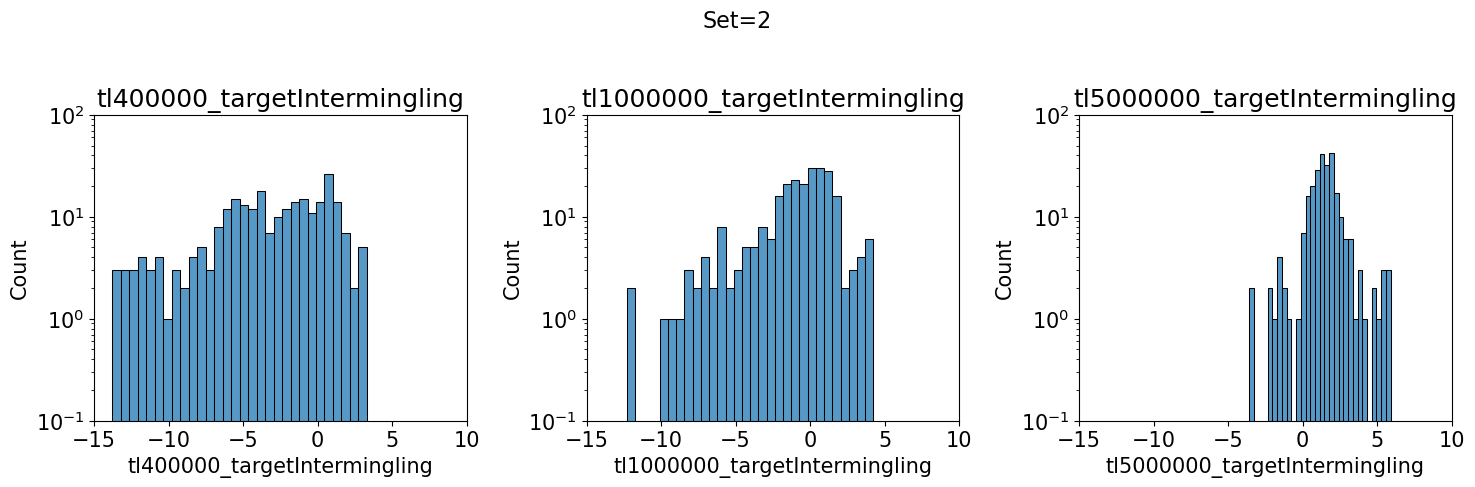

['tl400000_targetIntermingling', 'tl1000000_targetIntermingling', 'tl5000000_targetIntermingling']


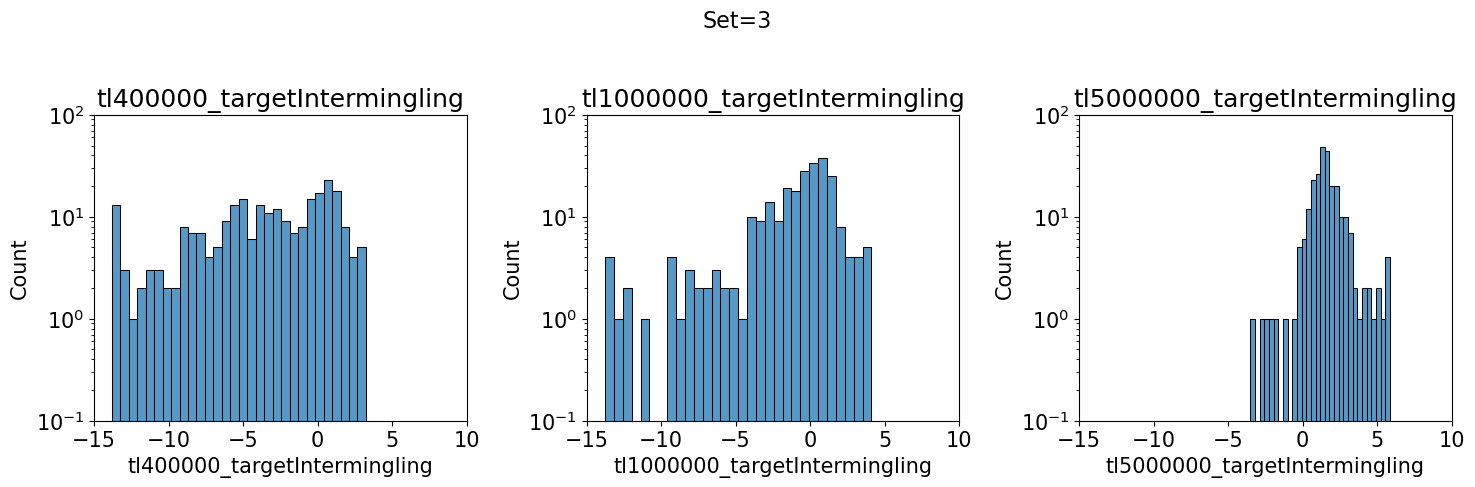

['tl400000_targetIntermingling', 'tl1000000_targetIntermingling', 'tl5000000_targetIntermingling']


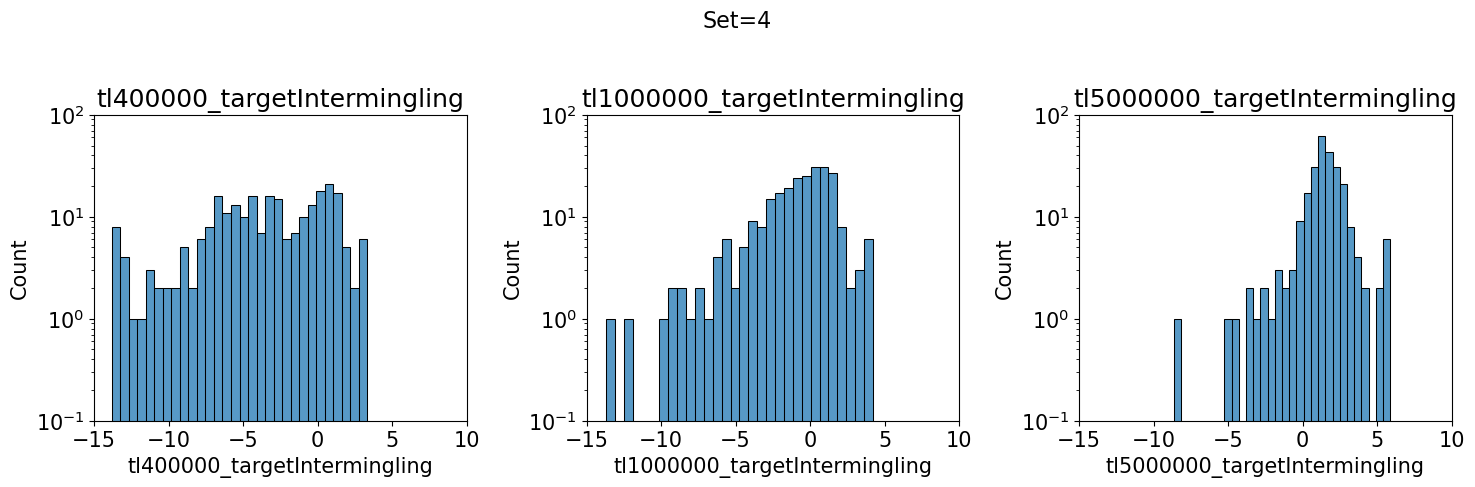

     Chrom1-id  Chrom2-id  InteractionStrength  Specific  \
0            0          1             1.744830         1   
1            0          2             2.056775         1   
2            0          3             1.049637         1   
3            0          4             1.303469         1   
4            0          5             2.155653         1   
..         ...        ...                  ...       ...   
248         19         21             3.023247         1   
249         19         22           -13.815511         0   
250         20         21             3.637586         1   
251         20         22           -13.815511         0   
252         21         22           -13.815511         0   

     tl400000_MeanIntermingling  tl400000_minReturnTime  \
0                     -1.846787                0.000380   
1                     -1.229828                0.000764   
2                     -1.330856                0.000264   
3                     -1.538578            

In [33]:

def get_avg_df(setlist,mode,stringcheck,
               prefix='dediff_aggregate_IM_data_sga0.001_epa4.0_sgat2'):
    avg_df = pd.DataFrame()

    # mode = "dediff"
    # stringcheck = "targetIntermingling"

    for set in setlist:
        df = pd.read_csv(prefix+'_set'+str(set)+'.csv')
        
        columns = [col for col in df.columns if stringcheck in col]
        print(columns)
        if len(columns) <4:
            n = 1
            m = 3
        else:
            n = int(len(columns) / 2)
            m = 2
        fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15, 5*n))
        fig.suptitle("Set=" + str(set), fontsize=16)
        
        for i, col in enumerate(columns):
            # print(df[col])
            if n == 1:
                ax = axes[i % m]
            else:
                ax = axes[i // m, i % m]
            sns.histplot(df[col], bins=30, ax=ax)
            ax.set_title(col)
            ax.set_xlim(-15,10)
            ax.set_ylim(0.1,100)
            ax.set_yscale('log')
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

        if avg_df.empty:
            avg_df = df.copy()
            avg_df[columns] = 0

        avg_df[columns] += df[columns]

    avg_df[columns] /= len(setlist)
    return avg_df

setlist = [1,2,3,4]

rejuv_lo_df = get_avg_df(setlist,"rejuv","targetIntermingling",
            prefix='rejuv_aggregate_IM_data_sga0.02_as0.6_sa100000_epa3.2')
rejuv_hi_df = get_avg_df(setlist,"rejuv","targetIntermingling",
            prefix='rejuv_aggregate_IM_data_sga0.02_as0.6_sa100000_epa6.00')
print(rejuv_lo_df)
print(rejuv_hi_df)

In [34]:
disc_rejuv_lo_df = IM_dms.discretize_columns(rejuv_lo_df, "_targetIntermingling",
                                     4, [-15, -9,1,8 ])


disc_rejuv_lo_df = IM_dms.discretize_columns(rejuv_lo_df, "InteractionStrength",
                                     4, None)

disc_rejuv_hi_df = IM_dms.discretize_columns(rejuv_hi_df, "_targetIntermingling",
                                     4, [-15, -9,1,8 ])


disc_rejuv_hi_df = IM_dms.discretize_columns(rejuv_hi_df, "InteractionStrength",
                                     4, None)

print(rejuv_lo_df.columns)
print(rejuv_hi_df.columns)

['tl400000_targetIntermingling', 'tl1000000_targetIntermingling', 'tl5000000_targetIntermingling']
['InteractionStrength']
['tl400000_targetIntermingling', 'tl1000000_targetIntermingling', 'tl5000000_targetIntermingling']
['InteractionStrength']
Index(['Chrom1-id', 'Chrom2-id', 'InteractionStrength', 'Specific',
       'tl400000_MeanIntermingling', 'tl400000_minReturnTime',
       'tl400000_MaxIntermingling', 'tl400000_targetIntermingling',
       'tl1000000_MeanIntermingling', 'tl1000000_minReturnTime',
       'tl1000000_MaxIntermingling', 'tl1000000_targetIntermingling',
       'tl5000000_MeanIntermingling', 'tl5000000_minReturnTime',
       'tl5000000_MaxIntermingling', 'tl5000000_targetIntermingling',
       'tl400000_targetIntermingling_discretized',
       'tl1000000_targetIntermingling_discretized',
       'tl5000000_targetIntermingling_discretized',
       'InteractionStrength_discretized'],
      dtype='object')
Index(['Chrom1-id', 'Chrom2-id', 'InteractionStrength', 'Specific

In [35]:
annot_dict = {
    'as': [r'$v_a$', 2],
    'epa': [r'$\epsilon_{{ij}}$', 3],
    'tl': [r'$t_{\mathrm{tot}}$', 2]
}
print(annot_dict)

{'as': ['$v_a$', 2], 'epa': ['$\\epsilon_{{ij}}$', 3], 'tl': ['$t_{\\mathrm{tot}}$', 2]}


['tl400000', 'tl1000000', 'tl5000000', 'tl400000', 'tl1000000', 'tl5000000']
cols extract ['Chrom1-id', 'Chrom2-id', 'Specific', 'InteractionStrength', 'InteractionStrength_discretized', 'tl1000000_MeanIntermingling', 'tl1000000_minReturnTime', 'tl1000000_MaxIntermingling', 'tl1000000_targetIntermingling', 'tl1000000_targetIntermingling_discretized']
tl1000000_targetIntermingling_discretized InteractionStrength_discretized ['tl1000000', 'targetIntermingling', 'discretized'] ['InteractionStrength', 'discretized']
['targetIntermingling-1,InteractionStrength-1', 'targetIntermingling-1,InteractionStrength-2', 'targetIntermingling-1,InteractionStrength-3', 'targetIntermingling-2,InteractionStrength-1', 'targetIntermingling-2,InteractionStrength-2', 'targetIntermingling-2,InteractionStrength-3', 'targetIntermingling-3,InteractionStrength-1', 'targetIntermingling-3,InteractionStrength-2', 'targetIntermingling-3,InteractionStrength-3']
col lengths 253 253
sets list 253
Index(['Chrom1-id', 'Chr

/tmp/ipykernel_407190/2247180068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sets_info'] = pd.Categorical(np.array(sets_list),


here cva tl1000000
$t_{\mathrm{tot}}$:350s


/tmp/ipykernel_407190/2247180068.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


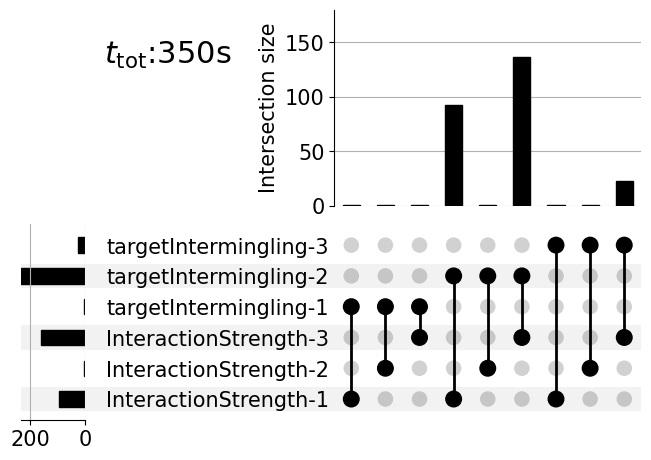

In [36]:
rejuv_vastr = [col.split('_')[0] for col in rejuv_lo_df.columns if 'targetIntermingling' in col]
print(rejuv_vastr)
# IM_cp.generate_upset_plot_w_prefix(rejuv_lo_df, annot_dict,rejuv_vastr[0],
#                              "_targetIntermingling_discretized",
#                              "InteractionStrength_discretized",nbins=4,
#                              )

generate_upset_plot_w_prefix(rejuv_lo_df, annot_dict,[rejuv_vastr[1]],
                             "_targetIntermingling_discretized",
                             "InteractionStrength_discretized",nbins=4,
                             )

cols extract ['Chrom1-id', 'Chrom2-id', 'Specific', 'InteractionStrength', 'InteractionStrength_discretized', 'tl5000000_MeanIntermingling', 'tl5000000_minReturnTime', 'tl5000000_MaxIntermingling', 'tl5000000_targetIntermingling', 'tl5000000_targetIntermingling_discretized']
tl5000000_targetIntermingling_discretized InteractionStrength_discretized ['tl5000000', 'targetIntermingling', 'discretized'] ['InteractionStrength', 'discretized']
['targetIntermingling-1,InteractionStrength-1', 'targetIntermingling-1,InteractionStrength-2', 'targetIntermingling-1,InteractionStrength-3', 'targetIntermingling-2,InteractionStrength-1', 'targetIntermingling-2,InteractionStrength-2', 'targetIntermingling-2,InteractionStrength-3', 'targetIntermingling-3,InteractionStrength-1', 'targetIntermingling-3,InteractionStrength-2', 'targetIntermingling-3,InteractionStrength-3']
col lengths 253 253
sets list 253
Index(['Chrom1-id', 'Chrom2-id', 'Specific', 'InteractionStrength',
       'InteractionStrength_discr

/tmp/ipykernel_407190/2247180068.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sets_info'] = pd.Categorical(np.array(sets_list),
/tmp/ipykernel_407190/2247180068.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


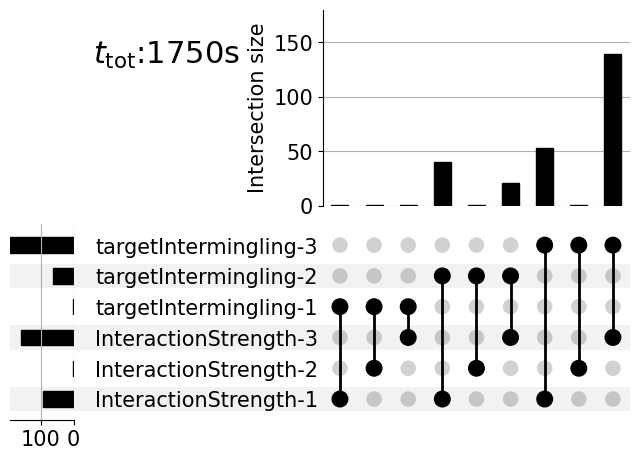

In [37]:
generate_upset_plot_w_prefix(rejuv_hi_df, annot_dict,[rejuv_vastr[-1]],
                             "_targetIntermingling_discretized",
                             "InteractionStrength_discretized",nbins=4,
                             )

In [38]:
row_subset = {'dediff':['Chrom1-id','Chrom2-id',
                        'InteractionStrength_discretized',
                        'as0.2_targetIntermingling_discretized',
                        'as0.7_targetIntermingling_discretized'],
              'rejuv_lo':['tl400000_targetIntermingling_discretized'],
              'rejuv_hi':['tl5000000_targetIntermingling_discretized']}
combined_df = pd.DataFrame()
# print(avg_df.columns)
print(rejuv_lo_df.columns)
for key, value in row_subset.items():
    print(key, value)
    if key == 'dediff':
        for col in value:
            # print(key,col)
            combined_df = pd.concat([combined_df, avg_df[[col]]], axis=1)
    elif key == 'rejuv_lo':
        for col in value:
            print(key,col)
            combined_df = pd.concat([combined_df, rejuv_lo_df[[col]]], axis=1)
    elif key == 'rejuv_hi':
        for col in value:
            print(key,col)
            combined_df = pd.concat([combined_df, rejuv_hi_df[[col]]], axis=1)

print(combined_df.columns)


Index(['Chrom1-id', 'Chrom2-id', 'InteractionStrength', 'Specific',
       'tl400000_MeanIntermingling', 'tl400000_minReturnTime',
       'tl400000_MaxIntermingling', 'tl400000_targetIntermingling',
       'tl1000000_MeanIntermingling', 'tl1000000_minReturnTime',
       'tl1000000_MaxIntermingling', 'tl1000000_targetIntermingling',
       'tl5000000_MeanIntermingling', 'tl5000000_minReturnTime',
       'tl5000000_MaxIntermingling', 'tl5000000_targetIntermingling',
       'tl400000_targetIntermingling_discretized',
       'tl1000000_targetIntermingling_discretized',
       'tl5000000_targetIntermingling_discretized',
       'InteractionStrength_discretized'],
      dtype='object')
dediff ['Chrom1-id', 'Chrom2-id', 'InteractionStrength_discretized', 'as0.2_targetIntermingling_discretized', 'as0.7_targetIntermingling_discretized']
rejuv_lo ['tl400000_targetIntermingling_discretized']
rejuv_lo tl400000_targetIntermingling_discretized
rejuv_hi ['tl5000000_targetIntermingling_discretized']
r

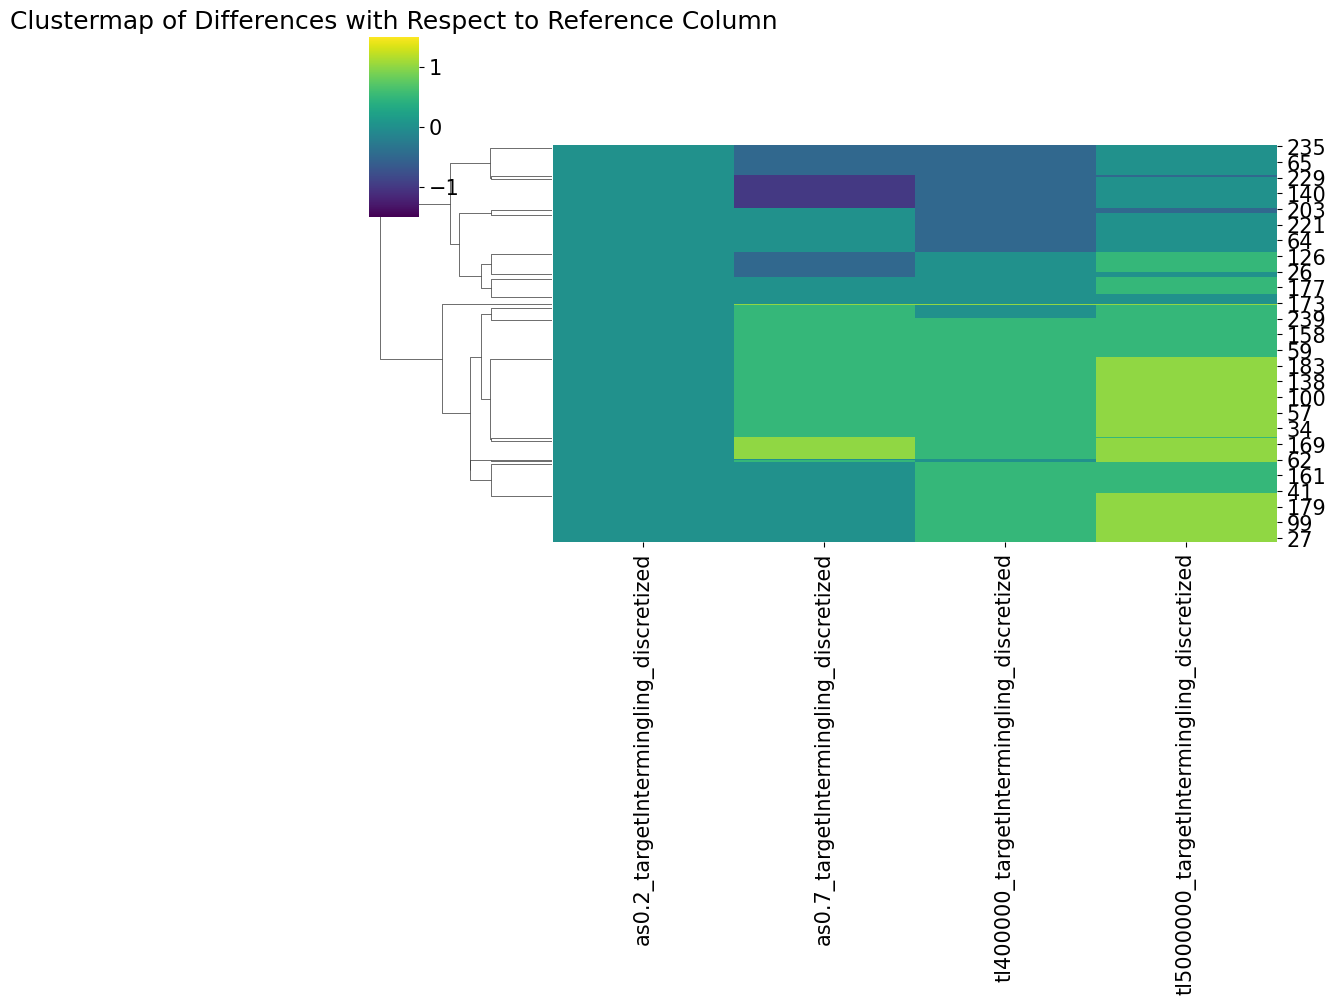

In [39]:
def generate_difference_clustermap(combined_df, reference_col, metadata_cols):
    """
    Generates a new dataframe from the non-metadata columns, where we store the difference of each column with respect to the reference column.
    Then plots a clustermap of the rows of the dataframe where only the rows are clustered.

    Parameters:
    - combined_df: pd.DataFrame - The input dataframe
    - reference_col: str - The name of the reference column
    - metadata_cols: list of str - The list of metadata columns

    Returns:
    - None
    """
    # Identify non-metadata columns
    non_metadata_cols = [col for col in combined_df.columns if col not in metadata_cols]

    # Generate the difference dataframe
    diff_df = combined_df[non_metadata_cols].apply(lambda x: x - combined_df[reference_col])

    # Perform z-score normalization
    global_min = combined_df[non_metadata_cols].min().min()
    global_max = combined_df[non_metadata_cols].max().max()
    diff_df = (diff_df - global_min) / (global_max - global_min)
    # Plot the clustermap
    sns.clustermap(diff_df,
                   row_cluster=True, col_cluster=False,
                   vmin=-1.5, vmax=1.5,
                   cmap='viridis',
                   figsize=(10, 10))
    plt.title("Clustermap of Differences with Respect to Reference Column")
    plt.show()

# Example usage
metadata_cols = ['Chrom1-id', 'Chrom2-id',
'InteractionStrength_discretized','Specific']
reference_col = 'as0.2_targetIntermingling_discretized'
generate_difference_clustermap(combined_df, reference_col, metadata_cols)

In [101]:
row_subset = {'dediff':['Chrom1-id','Chrom2-id',
                        'InteractionStrength_discretized',
                        'as0.2_targetIntermingling',
                        'as0.7_targetIntermingling'],
              'rejuv_lo':['tl400000_targetIntermingling'],
              'rejuv_hi':['tl5000000_targetIntermingling']}
combined_raw_df = pd.DataFrame()
# print(avg_df.columns)
print(rejuv_lo_df.columns)
for key, value in row_subset.items():
    print(key, value)
    if key == 'dediff':
        for col in value:
            # print(key,col)
            combined_raw_df = pd.concat([combined_raw_df, avg_df[[col]]], axis=1)
    elif key == 'rejuv_lo':
        for col in value:
            print(key,col)
            combined_raw_df = pd.concat([combined_raw_df, rejuv_lo_df[[col]]], axis=1)
    elif key == 'rejuv_hi':
        for col in value:
            print(key,col)
            combined_raw_df = pd.concat([combined_raw_df, rejuv_hi_df[[col]]], axis=1)

print(combined_raw_df.columns)


Index(['Chrom1-id', 'Chrom2-id', 'InteractionStrength', 'Specific',
       'tl400000_MeanIntermingling', 'tl400000_minReturnTime',
       'tl400000_MaxIntermingling', 'tl400000_targetIntermingling',
       'tl1000000_MeanIntermingling', 'tl1000000_minReturnTime',
       'tl1000000_MaxIntermingling', 'tl1000000_targetIntermingling',
       'tl5000000_MeanIntermingling', 'tl5000000_minReturnTime',
       'tl5000000_MaxIntermingling', 'tl5000000_targetIntermingling',
       'tl400000_targetIntermingling_discretized',
       'tl1000000_targetIntermingling_discretized',
       'tl5000000_targetIntermingling_discretized',
       'InteractionStrength_discretized'],
      dtype='object')
dediff ['Chrom1-id', 'Chrom2-id', 'InteractionStrength_discretized', 'as0.2_targetIntermingling', 'as0.7_targetIntermingling']
rejuv_lo ['tl400000_targetIntermingling']
rejuv_lo tl400000_targetIntermingling
rejuv_hi ['tl5000000_targetIntermingling']
rejuv_hi tl5000000_targetIntermingling
Index(['Chrom1-id', 'C

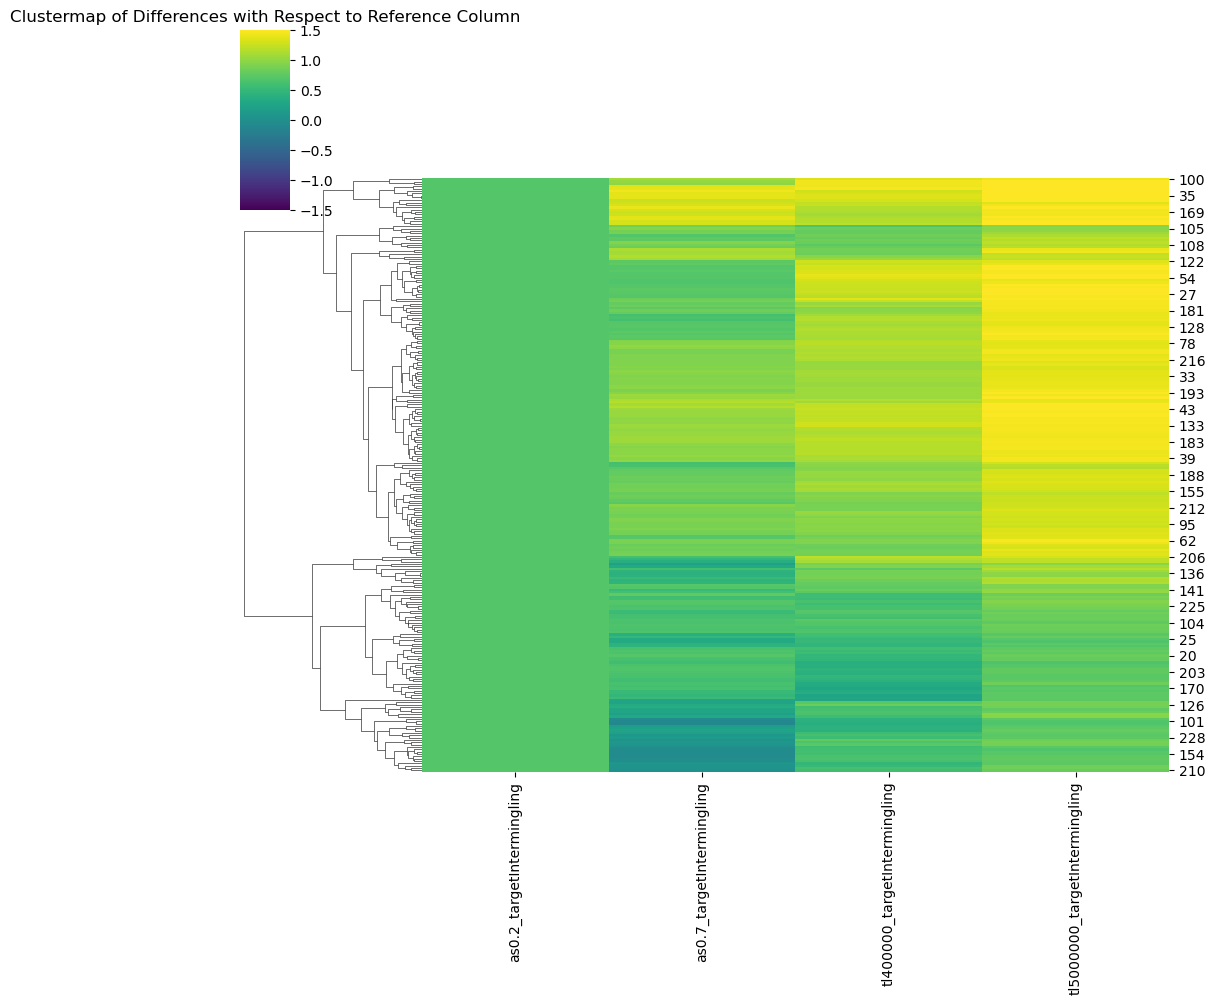

In [102]:
metadata_cols = ['Chrom1-id', 'Chrom2-id',
'InteractionStrength_discretized','Specific']
reference_col = 'as0.2_targetIntermingling'
generate_difference_clustermap(combined_raw_df, reference_col, metadata_cols)

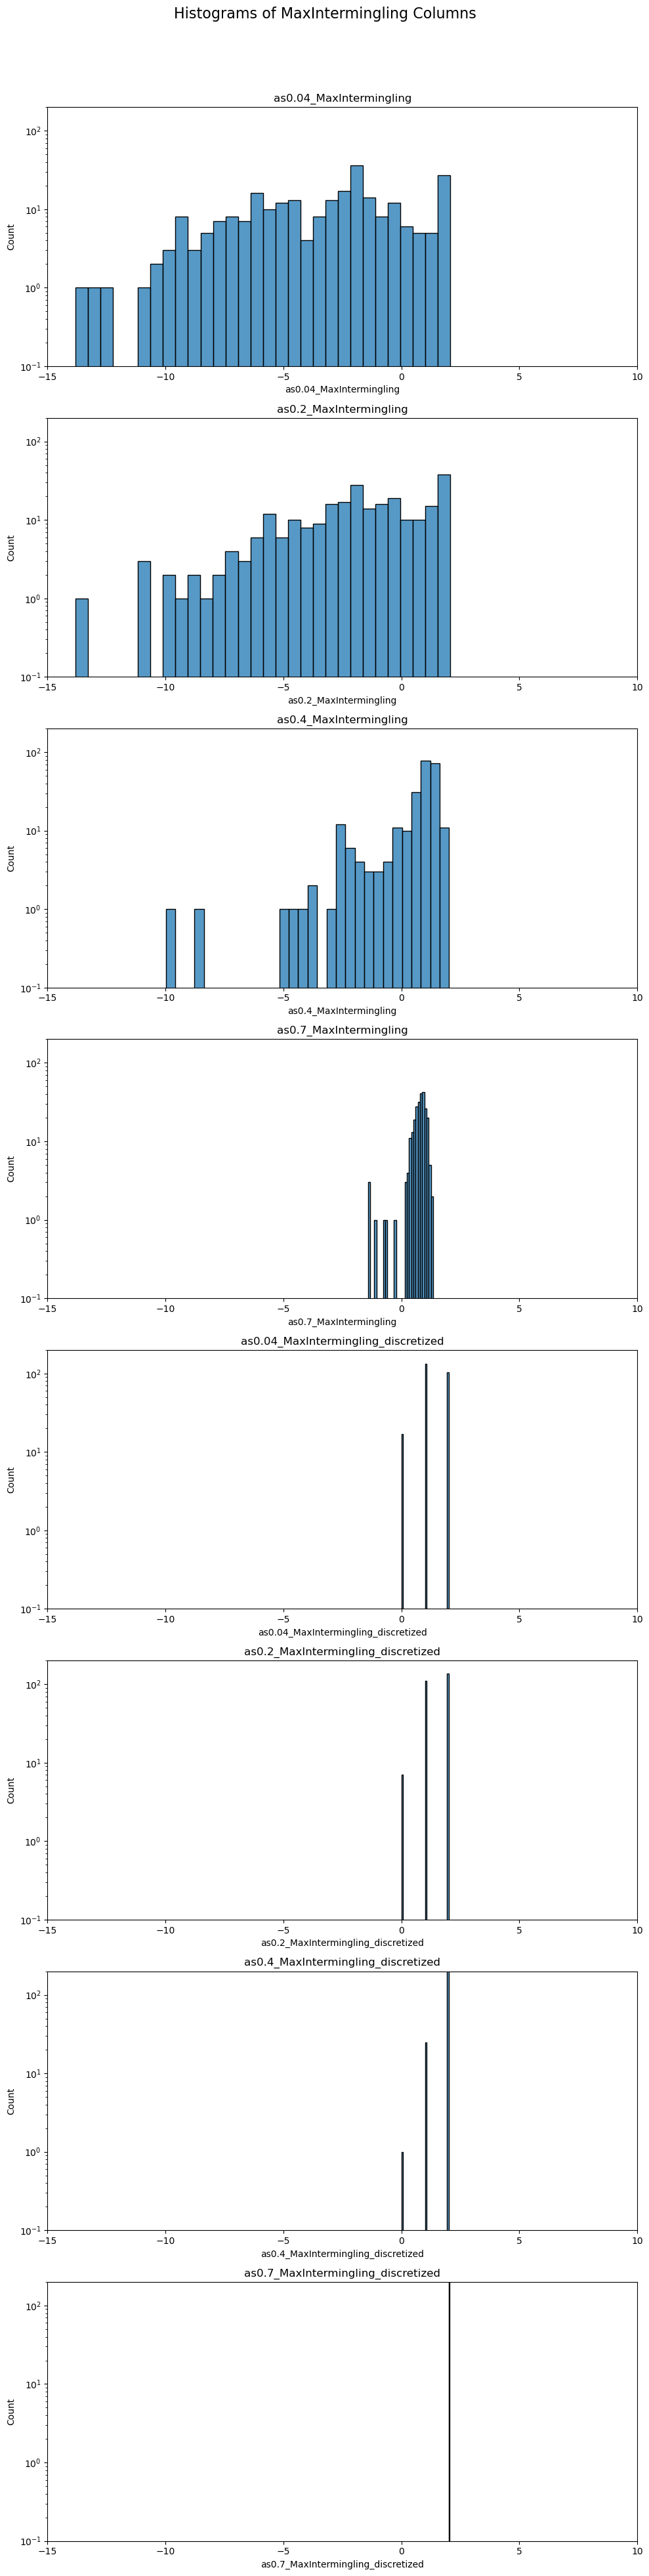

In [103]:
# Identify columns with 'MaxIntermingling' in their name
max_inter_columns = [col for col in avg_df.columns if 'MaxIntermingling' in col]

# Plot histograms for each of these columns
fig, axes = plt.subplots(nrows=len(max_inter_columns), ncols=1, figsize=(10, 5*len(max_inter_columns)))
fig.suptitle("Histograms of MaxIntermingling Columns", fontsize=16)

for i, col in enumerate(max_inter_columns):
    ax = axes[i]
    sns.histplot(avg_df[col], bins=30, ax=ax)
    ax.set_title(col)
    ax.set_xlim(-15,10)
    ax.set_ylim(0.1,200)
    ax.set_yscale('log')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

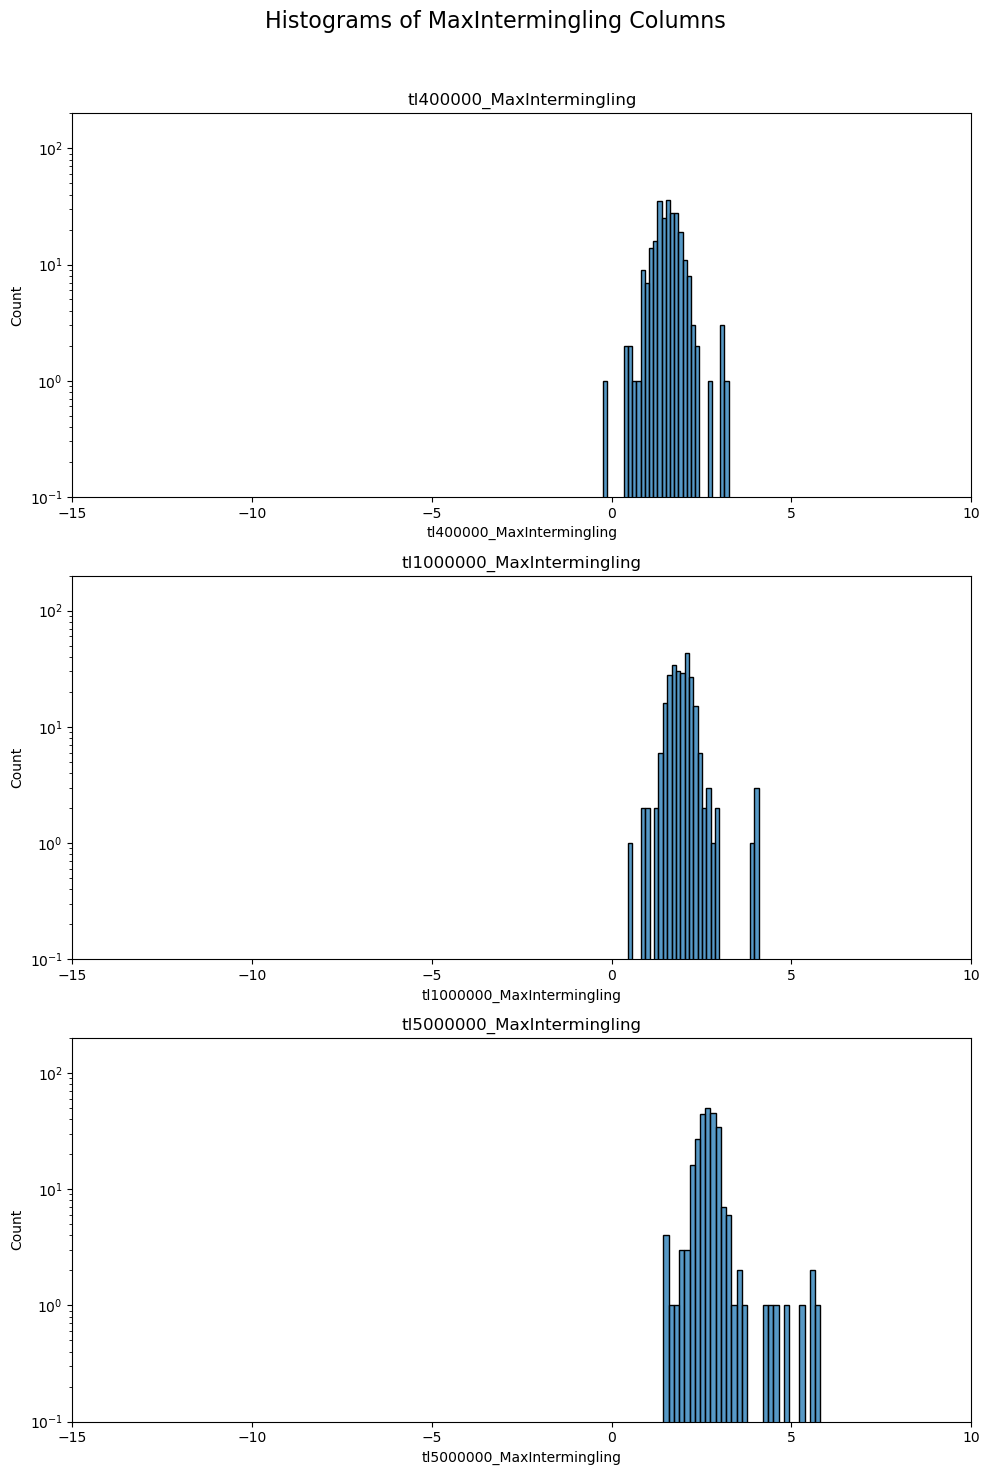

In [104]:
# Identify columns with 'MaxIntermingling' in their name
max_inter_columns = [col for col in rejuv_lo_df.columns if 'MaxIntermingling' in col]

# Plot histograms for each of these columns
fig, axes = plt.subplots(nrows=len(max_inter_columns), ncols=1, figsize=(10, 5*len(max_inter_columns)))
fig.suptitle("Histograms of MaxIntermingling Columns", fontsize=16)

for i, col in enumerate(max_inter_columns):
    ax = axes[i]
    sns.histplot(rejuv_lo_df[col], bins=30, ax=ax)
    ax.set_title(col)
    ax.set_xlim(-15,10)
    ax.set_ylim(0.1,200)
    ax.set_yscale('log')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

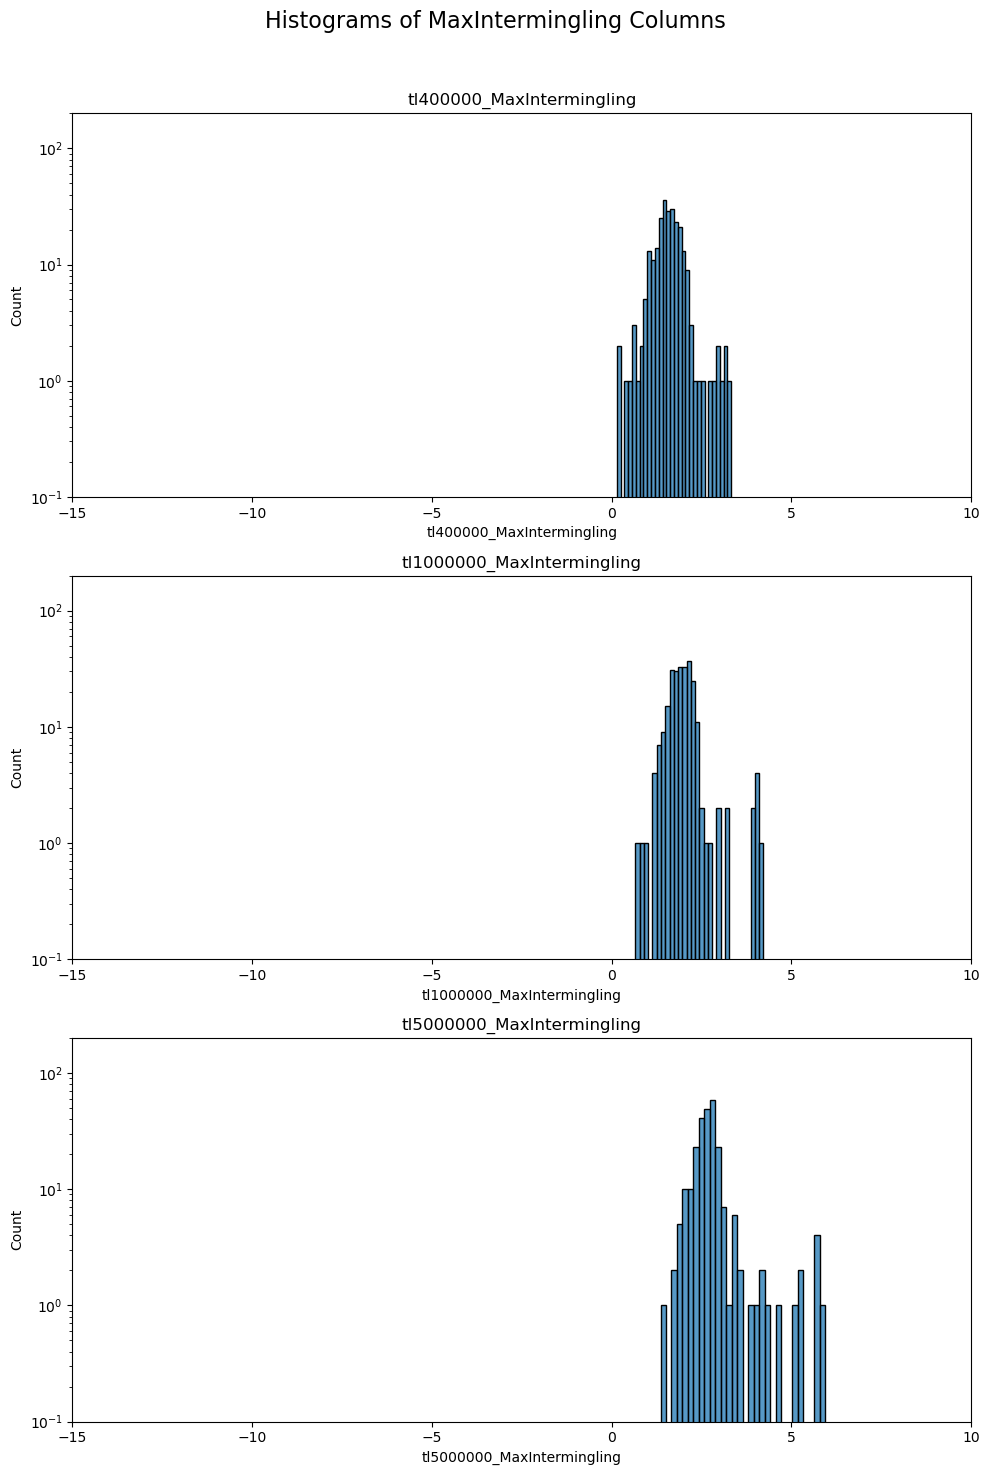

In [105]:
# Identify columns with 'MaxIntermingling' in their name
max_inter_columns = [col for col in rejuv_hi_df.columns if 'MaxIntermingling' in col]

# Plot histograms for each of these columns
fig, axes = plt.subplots(nrows=len(max_inter_columns), ncols=1, figsize=(10, 5*len(max_inter_columns)))
fig.suptitle("Histograms of MaxIntermingling Columns", fontsize=16)

for i, col in enumerate(max_inter_columns):
    ax = axes[i]
    sns.histplot(rejuv_hi_df[col], bins=30, ax=ax)
    ax.set_title(col)
    ax.set_xlim(-15,10)
    ax.set_ylim(0.1,200)
    ax.set_yscale('log')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [106]:
def plot_matrix(filtered_df,column_dict):
    column = list(column_dict.keys())[0]
    column_tag = column_dict[column]
    # Extract the Chrom1-id, Chrom2-id, and as0.2_targetIntermingling columns and store them in a list of tuples
    chrom_pairs = list(filtered_df[['Chrom1-id', 'Chrom2-id', column]].itertuples(index=False, name=None))

    # Create a 23x23 matrix initialized with NaN values
    matrix = np.full((23, 23), np.nan)

    # Populate the matrix with the as0.2_targetIntermingling values
    for chrom1_id, chrom2_id, target_inter in chrom_pairs:
        matrix[chrom1_id, chrom2_id] = target_inter
        matrix[chrom2_id, chrom1_id] = target_inter

    # Replace NaNs and infs with the non-NaN minimum value
    finite_values = matrix[np.isfinite(matrix)]
    min_value = np.min(finite_values)
    matrix = np.nan_to_num(matrix, nan=min_value, posinf=min_value, neginf=min_value)

    matrix = (matrix - np.min(matrix)) / (np.max(matrix) - np.min(matrix))
    # Write the matrix to a file
    np.savetxt("matrix_output.csv", matrix, delimiter=",")
    
    # Set the diagonal to NaN
    # Plot the matrix
    plt.figure(figsize=(5, 4))
    print(np.max(matrix))
    plt.imshow(matrix, cmap='viridis', interpolation='none')
    cbar = plt.colorbar(label=column_tag)
    cbar.set_label(column_tag, fontsize=18)
    cbar.ax.tick_params(labelsize=18)
    plt.xlabel('Chrom2-id',fontsize=18)
    plt.ylabel('Chrom1-id',fontsize=18)
    plt.xticks(ticks=np.arange(0,22,2), labels=np.arange(1, 23,2),fontsize=15)
    plt.yticks(ticks=np.arange(0,22,2), labels=np.arange(1, 23,2), fontsize=15)
    # plt.title('targeted Intermingling of high IAD, high maxIM subset')
    plt.show()
    # matrix = (matrix - np.min(matrix)) / (np.max(matrix) - np.min(matrix))

    print(chrom_pairs)

    return matrix


['tl400000_targetIntermingling', 'tl1000000_targetIntermingling', 'tl5000000_targetIntermingling']
1.0


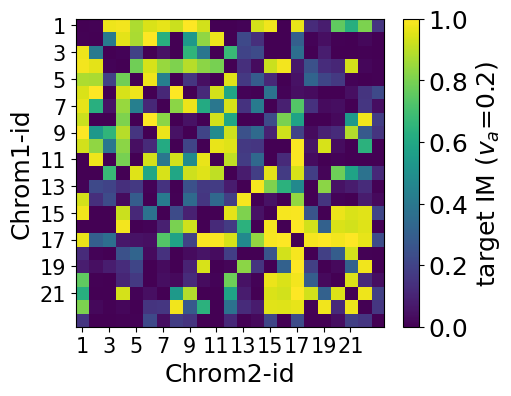

[(0, 1, -13.749371054732393), (0, 2, 1.687914410099978), (0, 3, 1.8118007169923929), (0, 4, 0.1347582062879716), (0, 5, 1.1991161561250645), (0, 6, 1.4877612251710577), (0, 7, 0.7955949101276453), (0, 8, 2.079274701958678), (0, 9, 1.022231051210794), (0, 10, -13.815436750161131), (0, 11, -13.815036433620346), (0, 12, -13.642428116393448), (0, 13, 1.051405242412822), (0, 14, 1.7209054116876388), (0, 15, -13.79539548247404), (0, 16, 1.567706455410878), (0, 17, -11.847918569905357), (0, 18, -12.564616341354707), (0, 19, -1.7753223022309863), (0, 20, -3.872501504978765), (0, 21, -1.0730315917333664), (0, 22, -11.386001151042311), (1, 2, -7.340474132742355), (1, 3, 1.4491825061510428), (1, 4, 0.0694664389054787), (1, 5, 2.075640627490917), (1, 6, -3.7635045910545006), (1, 7, -13.81551055796427), (1, 8, -5.324737615646699), (1, 9, -0.5638395963436482), (1, 10, 1.66547249673085), (1, 11, -13.815508524350523), (1, 12, -10.32652982385483), (1, 13, -11.684490271361096), (1, 14, -13.8155095874528

In [107]:
import pickle as pkl


disc_rejuv_lo_df = IM_dms.discretize_columns(rejuv_lo_df, "_targetIntermingling",
                                     4, [-15, -9,0,8 ])
filtered_df = avg_df[(avg_df['as0.2_targetIntermingling_discretized'] >= 1)]

ref_mat = plot_matrix(avg_df,{'as0.2_targetIntermingling':"target IM ($v_a$=0.2)"})

with open("ref_mat.pkl", "wb") as f:
    pkl.dump(ref_mat, f)

1.0


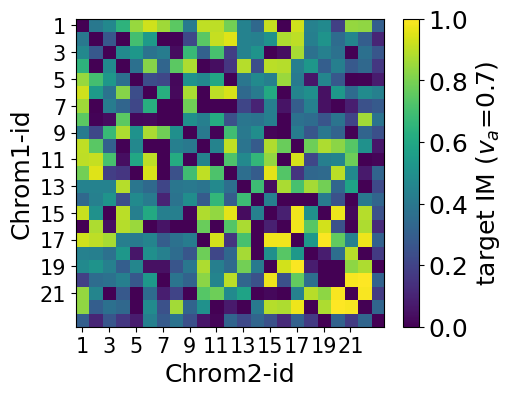

[(0, 1, -7.7003781216218945), (0, 2, -6.668531494019939), (0, 3, -3.928103449688496), (0, 4, -0.895744584727072), (0, 5, 0.3694420909171361), (0, 6, -0.7238000372132443), (0, 7, -2.3904748525424524), (0, 8, -7.45446964617554), (0, 9, -0.0329774649821774), (0, 10, -0.0721103284502045), (0, 11, -1.8036586309775005), (0, 12, -7.020334405135919), (0, 13, -8.650250602239485), (0, 14, 0.1843148414920918), (0, 15, -13.80251752143189), (0, 16, 0.3281523727618698), (0, 17, -7.0966202761715085), (0, 18, -6.569478736185308), (0, 19, -10.918558777353583), (0, 20, -0.9556527707043811), (0, 21, -1.077246168137325), (0, 22, -9.209756583091274), (1, 2, -9.590022900833528), (1, 3, -13.814419151772425), (1, 4, -3.136020485279192), (1, 5, -5.468976186262118), (1, 6, -13.814895250966243), (1, 7, -13.663710022322745), (1, 8, -10.502284129717337), (1, 9, -2.4674378064507496), (1, 10, 0.138057747598568), (1, 11, 0.6844885770912238), (1, 12, -7.071553802614368), (1, 13, -7.137586754707093), (1, 14, -6.0722253

In [108]:
import pickle as pkl

# dediff_mat = plot_matrix(avg_df,{'as1.0_targetIntermingling':"target IM ($v_a$=1.0)"})
dediff_mat = plot_matrix(avg_df,{'as0.7_targetIntermingling':"target IM ($v_a$=0.7)"})

with open("va0.7_dediff_mat.pkl", "wb") as f:
    pkl.dump(dediff_mat, f)


1.0


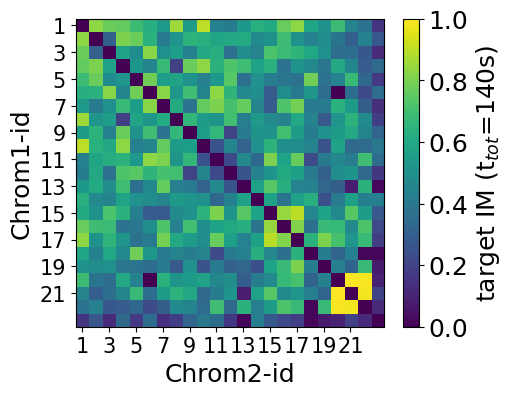

[(0, 1, 0.7006483113285575), (0, 2, -0.1027335626108043), (0, 3, -0.27211640292901607), (0, 4, -1.3396550652137293), (0, 5, -2.1089418865297547), (0, 6, -3.432673730279848), (0, 7, 1.016187642135623), (0, 8, -3.220198739337113), (0, 9, 1.6678966040639227), (0, 10, -4.80237279407128), (0, 11, -4.99418774905938), (0, 12, -3.48184738571102), (0, 13, -2.0313148302211657), (0, 14, -2.422094555472284), (0, 15, -0.20398554917232312), (0, 16, 0.7114291441909866), (0, 17, -2.6915607511403326), (0, 18, -3.8052460476733), (0, 19, -1.339301087717018), (0, 20, -4.6743583695487345), (0, 21, -5.5732068824912275), (0, 22, -8.780007162841539), (1, 2, -6.653459160835934), (1, 3, 0.30865421347722144), (1, 4, -0.1041386619093963), (1, 5, -2.010254562572461), (1, 6, -5.0982457357321955), (1, 7, -3.6295729622472694), (1, 8, -1.8906027445710556), (1, 9, -2.0429055683359145), (1, 10, -2.6274547825654992), (1, 11, -2.460271528462645), (1, 12, -2.3719615595701717), (1, 13, -4.205123363423139), (1, 14, -3.788220

In [109]:
lorejuv_mat = plot_matrix(rejuv_lo_df,{'tl400000_targetIntermingling':"target IM (t$_{tot}$=140s)"})

with open("lorejuv_mat.pkl", "wb") as f:
    pkl.dump(lorejuv_mat, f)

1.0


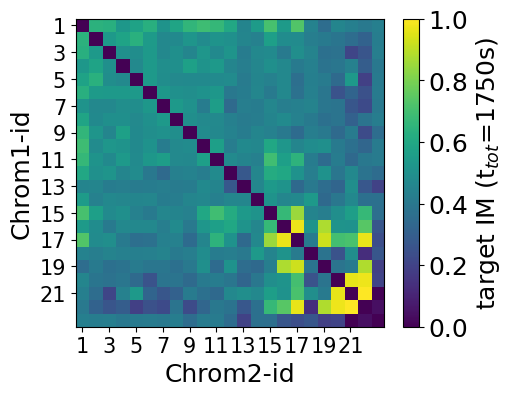

[(0, 1, 2.9868808572227126), (0, 2, 2.9141960585013167), (0, 3, 2.0732844664236314), (0, 4, 2.474614503929051), (0, 5, 2.9085706848846224), (0, 6, 1.9546261271923928), (0, 7, 2.5204020734300254), (0, 8, 3.127671195155968), (0, 9, 3.3617378158943816), (0, 10, 3.190158330743162), (0, 11, 2.6553973619824016), (0, 12, 1.4340982796344646), (0, 13, 2.2255134094216555), (0, 14, 3.527557958059114), (0, 15, 2.1929610473106105), (0, 16, 3.6865735059177864), (0, 17, 1.3906668706774248), (0, 18, 0.6801662352670265), (0, 19, 1.483156024321778), (0, 20, 1.2778295600866318), (0, 21, 1.0670380986811159), (0, 22, 1.291245928904335), (1, 2, 2.1597122735842817), (1, 3, 2.487232055557061), (1, 4, 2.945941433023796), (1, 5, 2.2009930152029225), (1, 6, 1.5782975990131785), (1, 7, 1.649166928428828), (1, 8, 2.0267081910429448), (1, 9, 1.709297154608351), (1, 10, 1.9596388257104467), (1, 11, 1.8734194324505573), (1, 12, 1.4917647194403914), (1, 13, 1.3439603230855908), (1, 14, 2.3569378734005904), (1, 15, 1.7

In [110]:
hirejuv_mat = plot_matrix(rejuv_hi_df,{'tl5000000_targetIntermingling':"target IM (t$_{tot}$=1750s)"})

with open("hirejuv_mat.pkl", "wb") as f:
    pkl.dump(hirejuv_mat, f)

1.0


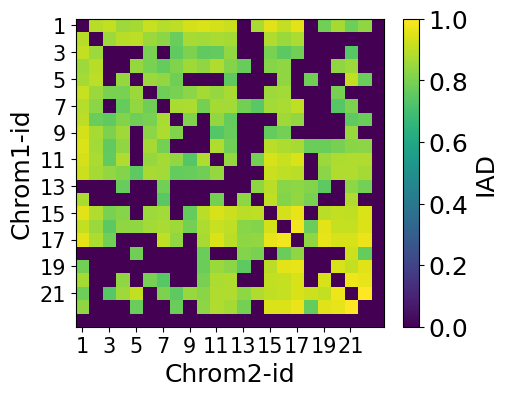

[(0, 1, 1.744830147616676), (0, 2, 2.056774703946327), (0, 3, 1.0496366573007003), (0, 4, 1.3034693907071266), (0, 5, 2.1556528805631494), (0, 6, 1.67478941551228), (0, 7, 1.9044258817093864), (0, 8, 2.500592727473075), (0, 9, 2.65821990618429), (0, 10, 2.490862959039597), (0, 11, 2.250383491483605), (0, 12, -13.815510557964274), (0, 13, 1.4194159837299531), (0, 14, 2.873862052975153), (0, 15, 2.022773963242833), (0, 16, 2.893375187526992), (0, 17, -13.815510557964274), (0, 18, -0.0505325312096751), (0, 19, 1.2572019587267824), (0, 20, -0.2264076226036371), (0, 21, 0.7445011981038077), (0, 22, -13.815510557964274), (1, 2, 1.1031450003916017), (1, 3, 1.7343745003146789), (1, 4, 1.929034989683272), (1, 5, 1.0433916432005614), (1, 6, 0.6097650281424858), (1, 7, -0.3495901008155214), (1, 8, 1.3721718563406695), (1, 9, 1.2499662040502806), (1, 10, 1.441332347886937), (1, 11, 1.296655444259707), (1, 12, -13.815510557964274), (1, 13, -13.815510557964274), (1, 14, 1.5762990353654307), (1, 15, 

In [111]:
iad_mat = plot_matrix(rejuv_hi_df,{'InteractionStrength':"IAD"})

with open("iad_mat.pkl", "wb") as f:
    pkl.dump(iad_mat, f)    

In [112]:
dediff_mat = plot_matrix(avg_df,{'as1.0_targetIntermingling':"target IM ($v_a$=1.0)"})

with open("va1.0_dediff_mat.pkl", "wb") as f:
    pkl.dump(dediff_mat, f)

KeyError: "['as1.0_targetIntermingling'] not in index"

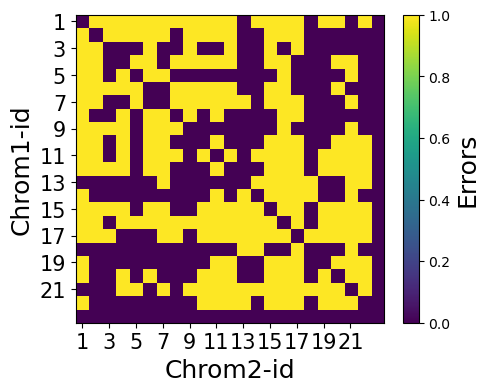

In [ ]:
iad_rel = iad_mat - np.median(iad_mat)
dediff_rel = dediff_mat - np.median(dediff_mat)

plt.figure(figsize=(5, 4))
plt.imshow(iad_rel > 0,vmin=0,vmax=1)
cbar = plt.colorbar(label="Errors")
cbar.set_label("Errors", fontsize=18)
plt.xlabel('Chrom2-id',fontsize=18)
plt.ylabel('Chrom1-id',fontsize=18)
plt.xticks(ticks=np.arange(0,22,2), labels=np.arange(1, 23,2),fontsize=15)
plt.yticks(ticks=np.arange(0,22,2), labels=np.arange(1, 23,2), fontsize=15)
# plt.title('targeted Intermingling of high IAD, high maxIM subset')
plt.show()


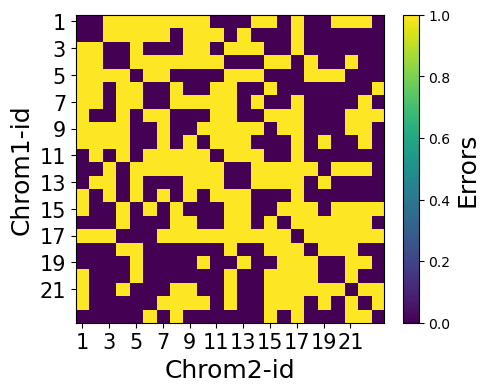

In [ ]:

ref_rel = ref_mat - np.median(ref_mat)
plt.figure(figsize=(5, 4))
plt.imshow(ref_rel > 0,vmin=0,vmax=1)
cbar = plt.colorbar(label="Errors")
cbar.set_label("Errors", fontsize=18)
plt.xlabel('Chrom2-id',fontsize=18)
plt.ylabel('Chrom1-id',fontsize=18)
plt.xticks(ticks=np.arange(0,22,2), labels=np.arange(1, 23,2),fontsize=15)
plt.yticks(ticks=np.arange(0,22,2), labels=np.arange(1, 23,2), fontsize=15)
# plt.title('targeted Intermingling of high IAD, high maxIM subset')
plt.show()

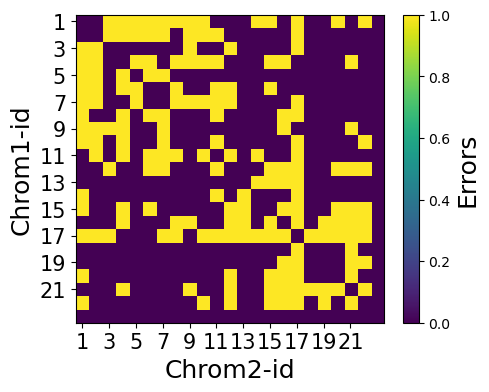

In [ ]:
ref_rel_mask = ref_rel > 0
iad_rel_mask = iad_rel > 0
plt.figure(figsize=(5, 4))
plt.imshow(ref_rel_mask*iad_rel_mask,vmin=0,vmax=1)
cbar = plt.colorbar(label="Errors")
cbar.set_label("Errors", fontsize=18)
plt.xlabel('Chrom2-id',fontsize=18)
plt.ylabel('Chrom1-id',fontsize=18)
plt.xticks(ticks=np.arange(0,22,2), labels=np.arange(1, 23,2),fontsize=15)
plt.yticks(ticks=np.arange(0,22,2), labels=np.arange(1, 23,2), fontsize=15)
# plt.title('targeted Intermingling of high IAD, high maxIM subset')
plt.show()

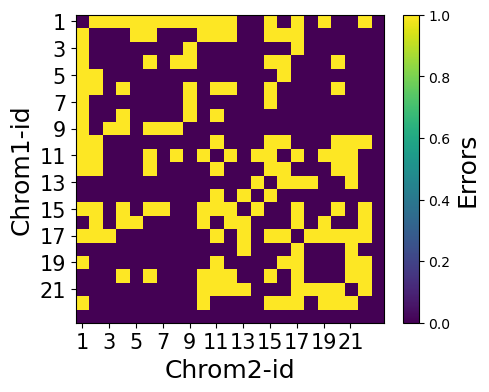

In [ ]:
dediff_rel = dediff_mat - np.median(dediff_mat)
dediff_rel_mask = dediff_rel > 0
plt.figure(figsize=(5, 4))
plt.imshow(dediff_rel_mask*iad_rel_mask,vmin=0,vmax=1)
cbar = plt.colorbar(label="Errors")
cbar.set_label("Errors", fontsize=18)
plt.xlabel('Chrom2-id',fontsize=18)
plt.ylabel('Chrom1-id',fontsize=18)
plt.xticks(ticks=np.arange(0,22,2), labels=np.arange(1, 23,2),fontsize=15)
plt.yticks(ticks=np.arange(0,22,2), labels=np.arange(1, 23,2), fontsize=15)
# plt.title('targeted Intermingling of high IAD, high maxIM subset')
plt.show()

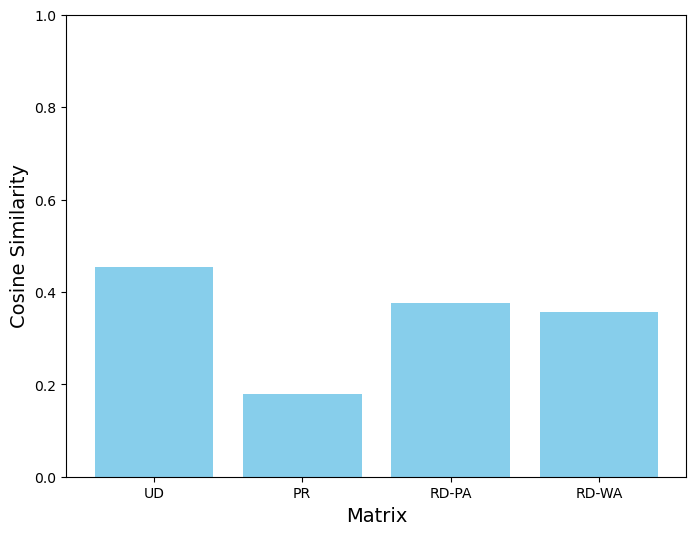

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

import matplotlib.pyplot as plt

ref_rel = ref_mat - np.mean(ref_mat)
ref_rel_mask = ref_rel > 0

dediff_rel = dediff_mat - np.mean(dediff_mat)
dediff_rel_mask = dediff_rel > 0

iad_rel = iad_mat - np.median(iad_mat)
iad_rel_mask = iad_rel > 0


lorejuv_rel = lorejuv_mat - np.mean(lorejuv_mat)
lorejuv_rel_mask = lorejuv_rel > 0

hirejuv_rel = hirejuv_mat - np.mean(hirejuv_mat)
hirejuv_rel_mask = hirejuv_rel > 0
# Flatten the matrices to 1D arrays
# iad_flat = iad_mat.flatten()
# ref_flat = ref_mat.flatten()
# dediff_flat = dediff_mat.flatten()
# lorejuv_flat = lorejuv_mat.flatten()
# hirejuv_flat = hirejuv_mat.flatten()

# Extract only the upper diagonal entries and store as flat arrays
iad_flat = iad_rel[np.triu_indices_from(iad_rel, k=1)]
ref_flat = ref_rel[np.triu_indices_from(ref_rel, k=1)]
dediff_flat = dediff_rel[np.triu_indices_from(dediff_rel, k=1)]
lorejuv_flat = lorejuv_rel[np.triu_indices_from(lorejuv_rel, k=1)]
hirejuv_flat = hirejuv_rel[np.triu_indices_from(hirejuv_rel, k=1)]

# Compute cosine similarities
cosine_similarities = {
    "UD": cosine_similarity([iad_flat], [ref_flat])[0][0],
    "PR": cosine_similarity([iad_flat], [dediff_flat])[0][0],
    "RD-PA": cosine_similarity([iad_flat], [lorejuv_flat])[0][0],
    "RD-WA": cosine_similarity([iad_flat], [hirejuv_flat])[0][0],
}


# Plot the cosine similarities
plt.figure(figsize=(8, 6))
plt.bar(cosine_similarities.keys(), cosine_similarities.values(), color='skyblue')
# plt.title("Cosine Similarity with iad_mat", fontsize=16)
plt.ylabel("Cosine Similarity", fontsize=14)
plt.xlabel("Matrix", fontsize=14)
plt.ylim(0, 1)
plt.show()

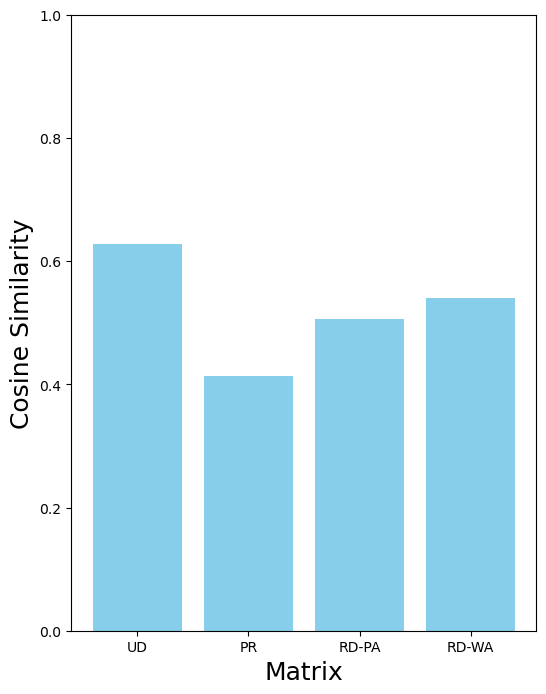

In [ ]:
ref_rel = (ref_mat > np.mean(ref_mat)+0.5*np.std(ref_mat)) | (ref_mat < np.mean(ref_mat)-0.5*np.std(ref_mat))
dediff_rel = (dediff_mat > np.mean(dediff_mat)+0.5*np.std(dediff_mat)) | (dediff_mat < np.mean(dediff_mat)-0.5*np.std(dediff_mat))
iad_rel = (iad_mat > np.median(iad_mat)+0.25*np.std(iad_mat)) | (iad_mat < np.median(iad_mat)-0.25*np.std(iad_mat))
lorejuv_rel = (lorejuv_mat > np.mean(lorejuv_mat)+0.5*np.std(lorejuv_mat)) | (lorejuv_mat < np.mean(lorejuv_mat)-0.5*np.std(lorejuv_mat))
hirejuv_rel = (hirejuv_mat > np.mean(hirejuv_mat)+0.5*np.std(hirejuv_mat)) | (hirejuv_mat < np.mean(hirejuv_mat)-0.5*np.std(hirejuv_mat))

iad_flat = iad_rel[np.triu_indices_from(iad_rel, k=1)]
ref_flat = ref_rel[np.triu_indices_from(ref_rel, k=1)]
dediff_flat = dediff_rel[np.triu_indices_from(dediff_rel, k=1)]
lorejuv_flat = lorejuv_rel[np.triu_indices_from(lorejuv_rel, k=1)]
hirejuv_flat = hirejuv_rel[np.triu_indices_from(hirejuv_rel, k=1)]

# Compute cosine similarities
cosine_similarities = {
    "UD": cosine_similarity([iad_flat], [ref_flat])[0][0],
    "PR": cosine_similarity([iad_flat], [dediff_flat])[0][0],
    "RD-PA": cosine_similarity([iad_flat], [lorejuv_flat])[0][0],
    "RD-WA": cosine_similarity([iad_flat], [hirejuv_flat])[0][0],
}

# Plot the cosine similarities
plt.figure(figsize=(6,8))
plt.bar(cosine_similarities.keys(), cosine_similarities.values(), color='skyblue')
# plt.title("Cosine Similarity with iad_mat", fontsize=16)
plt.ylabel("Cosine Similarity", fontsize=18)
plt.xlabel("Matrix", fontsize=18)
plt.ylim(0, 1)
plt.show()

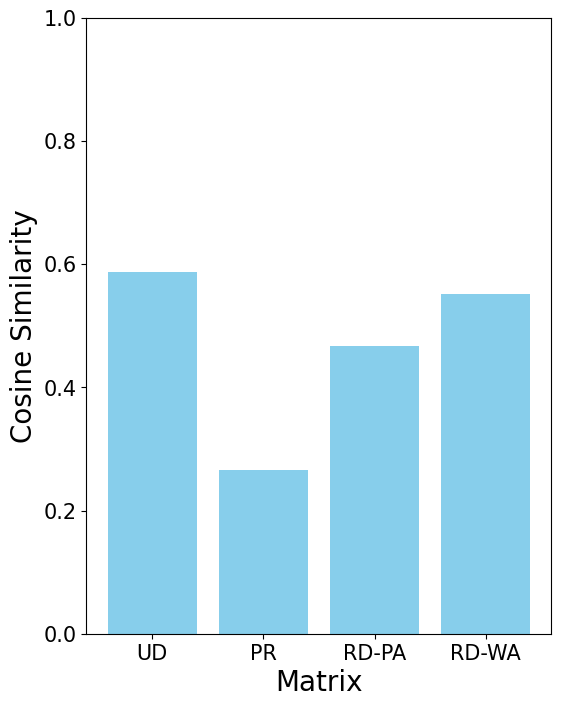

In [ ]:
ref_rel = np.where(ref_mat > np.mean(ref_mat) + 0.25 * np.std(ref_mat), 1,
                   np.where(ref_mat < np.mean(ref_mat) - 0.25 * np.std(ref_mat), -1, 0))
dediff_rel = np.where(dediff_mat > np.mean(dediff_mat) + 0.25 * np.std(dediff_mat), 1,
                      np.where(dediff_mat < np.mean(dediff_mat) - 0.25 * np.std(dediff_mat), -1, 0))
iad_rel = np.where(iad_mat > np.median(iad_mat) + 0.25 * np.std(iad_mat), 1,
                  np.where(iad_mat < np.median(iad_mat) - 0.25 * np.std(iad_mat), -1, 0))
lorejuv_rel = np.where(lorejuv_mat > np.mean(lorejuv_mat) + 0.25 * np.std(lorejuv_mat), 1,
                      np.where(lorejuv_mat < np.mean(lorejuv_mat) - 0.25 * np.std(lorejuv_mat), -1, 0))
hirejuv_rel = np.where(hirejuv_mat > np.mean(hirejuv_mat) + 0.25 * np.std(hirejuv_mat), 1,
                      np.where(hirejuv_mat < np.mean(hirejuv_mat) - 0.25 * np.std(hirejuv_mat), -1, 0))

iad_flat = iad_rel[np.triu_indices_from(iad_rel, k=1)]
ref_flat = ref_rel[np.triu_indices_from(ref_rel, k=1)]
dediff_flat = dediff_rel[np.triu_indices_from(dediff_rel, k=1)]
lorejuv_flat = lorejuv_rel[np.triu_indices_from(lorejuv_rel, k=1)]
hirejuv_flat = hirejuv_rel[np.triu_indices_from(hirejuv_rel, k=1)]

# Compute cosine similarities
cosine_similarities = {
    "UD": cosine_similarity([iad_flat], [ref_flat])[0][0],
    "PR": cosine_similarity([iad_flat], [dediff_flat])[0][0],
    "RD-PA": cosine_similarity([iad_flat], [lorejuv_flat])[0][0],
    "RD-WA": cosine_similarity([iad_flat], [hirejuv_flat])[0][0],
}

# Plot the cosine similarities
plt.figure(figsize=(6,8))
plt.bar(cosine_similarities.keys(), cosine_similarities.values(), color='skyblue')
# plt.title("Cosine Similarity with iad_mat", fontsize=16)
plt.ylabel("Cosine Similarity", fontsize=20)
plt.xlabel("Matrix", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 1)
plt.show()

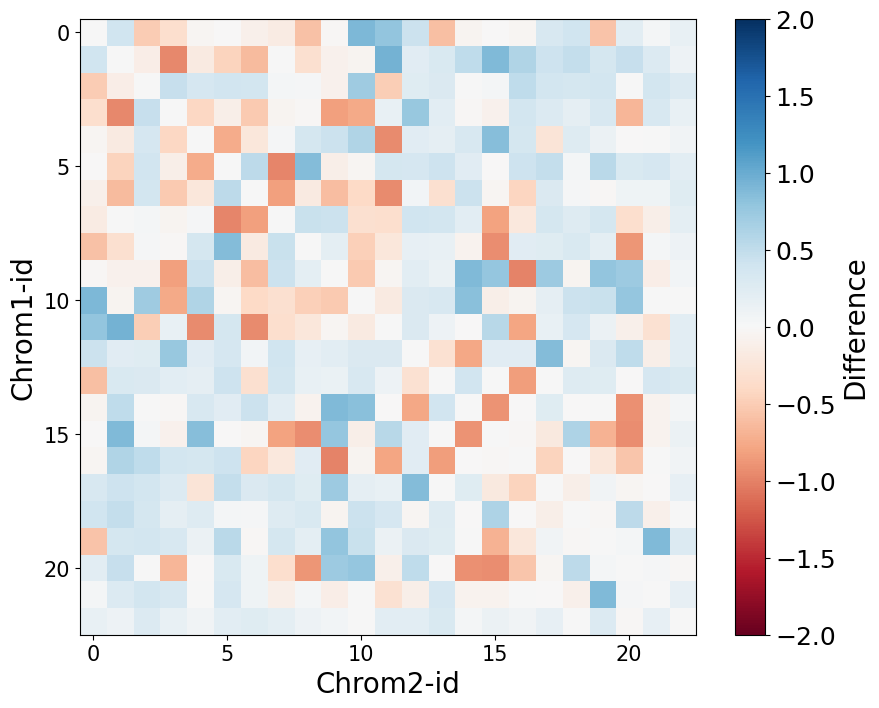

In [ ]:
# Calculate the difference matrix
difference_matrix = dediff_mat - ref_mat
# difference_matrix = lorejuv_mat - ref_mat
# difference_matrix = hirejuv_mat - ref_mat

# Plot the difference matrix
plt.figure(figsize=(10, 8))
plt.imshow(difference_matrix, cmap='RdBu', interpolation='none', vmin=-2, vmax=2)
cbar = plt.colorbar(label='Difference')
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Difference', fontsize=20)
plt.xlabel('Chrom2-id', fontsize=20)
plt.ylabel('Chrom1-id', fontsize=20)
plt.xticks(fontsize=15, ticks=np.arange(0, difference_matrix.shape[1], 5))
plt.yticks(fontsize=15, ticks=np.arange(0, difference_matrix.shape[0], 5))
# plt.title('Difference Matrix (dediff_mat - ref_mat)', fontsize=16)
plt.show()

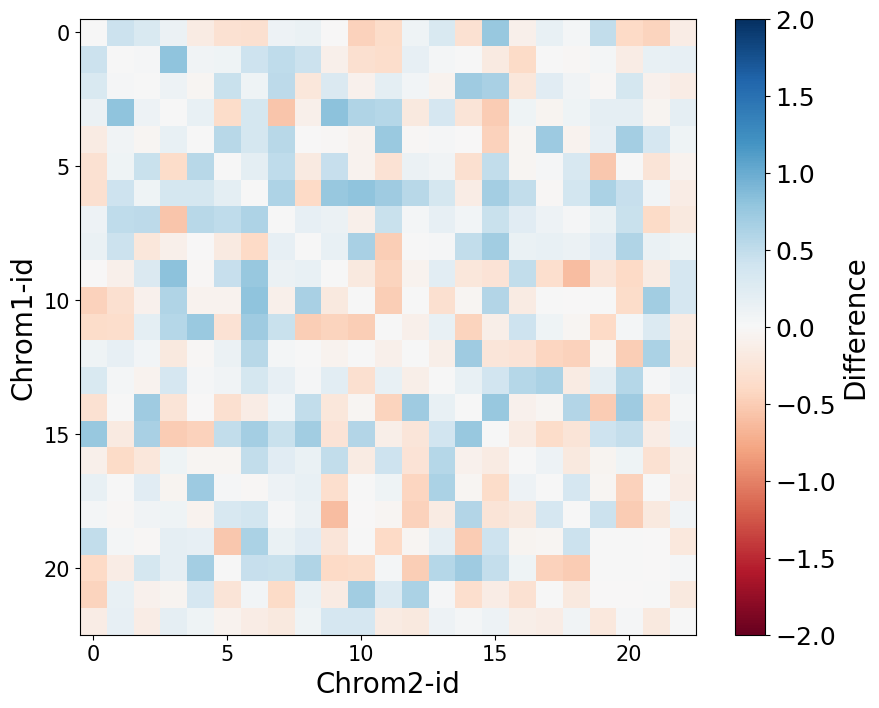

In [ ]:
difference_matrix = lorejuv_mat - dediff_mat


# Plot the difference matrix
plt.figure(figsize=(10, 8))
plt.imshow(difference_matrix, cmap='RdBu', interpolation='none',vmin = -2, vmax=2)
cbar = plt.colorbar(label='Difference')
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Difference', fontsize=20)
plt.xlabel('Chrom2-id', fontsize=20)
plt.ylabel('Chrom1-id', fontsize=20)
plt.xticks(fontsize=15, ticks=np.arange(0, difference_matrix.shape[1], 5))
plt.yticks(fontsize=15, ticks=np.arange(0, difference_matrix.shape[0], 5))
# plt.title('Difference Matrix (dediff_mat - ref_mat)', fontsize=16)
plt.show()

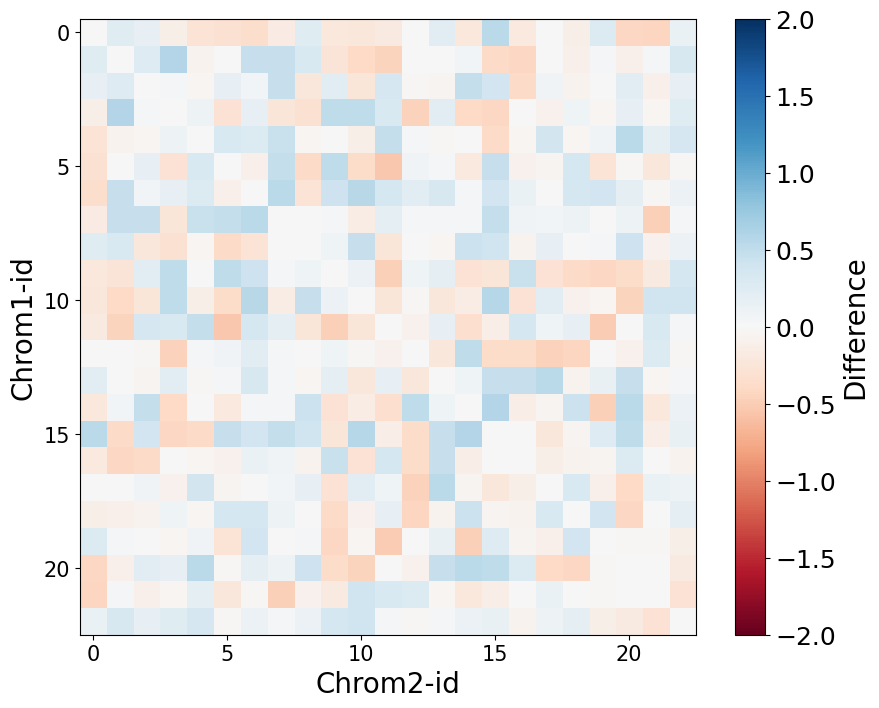

In [ ]:
difference_matrix = hirejuv_mat - dediff_mat


# Plot the difference matrix
plt.figure(figsize=(10, 8))
plt.imshow(difference_matrix, cmap='RdBu', interpolation='none',vmin = -2, vmax=2)
cbar = plt.colorbar(label='Difference')
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Difference', fontsize=20)
plt.xlabel('Chrom2-id', fontsize=20)
plt.ylabel('Chrom1-id', fontsize=20)
plt.xticks(fontsize=15, ticks=np.arange(0, difference_matrix.shape[1], 5))
plt.yticks(fontsize=15, ticks=np.arange(0, difference_matrix.shape[0], 5))
# plt.title('Difference Matrix (dediff_mat - ref_mat)', fontsize=16)
plt.show()

In [ ]:
# ref_mat_max = plot_matrix(avg_df,{'as0.2_MaxIntermingling':"target IM ($v_a$=0.2)"})
# dediff_mat_max = plot_matrix(avg_df,{'as0.7_MaxIntermingling':"target IM ($v_a$=0.7)"})
# lorejuv_mat_max = plot_matrix(rejuv_lo_df,{'tl400000_MaxIntermingling':"target IM (sim length = 400000)"})
# hirejuv_mat_max = plot_matrix(rejuv_hi_df,{'tl5000000_MaxIntermingling':"target IM (sim length = 5000000)"})

In [ ]:
# difference_matrix =  hirejuv_mat_max - ref_mat_max


# # Plot the difference matrix
# plt.figure(figsize=(10, 8))
# plt.imshow(difference_matrix, cmap='RdBu', interpolation='none',vmin = -1, vmax=1)
# cbar = plt.colorbar(label='Difference')
# cbar.ax.tick_params(labelsize=18)
# cbar.set_label('Difference', fontsize=20)
# plt.xlabel('Chrom2-id', fontsize=20)
# plt.ylabel('Chrom1-id', fontsize=20)
# plt.xticks(fontsize=15, ticks=np.arange(0, difference_matrix.shape[1], 5))
# plt.yticks(fontsize=15, ticks=np.arange(0, difference_matrix.shape[0], 5))
# # plt.title('Difference Matrix (dediff_mat - ref_mat)', fontsize=16)
# plt.show()

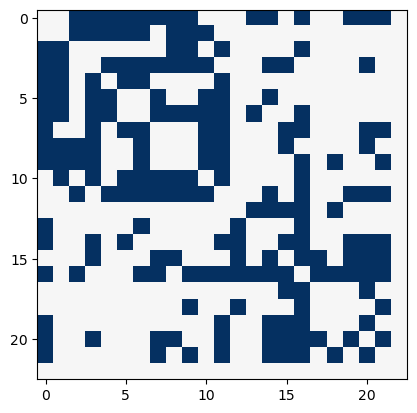

In [ ]:
# ref_mat,dediff_mat,lorejuv_mat,hirejuv_mat

# ref_mat_signal = ref_mat - np.median(ref_mat[np.isfinite(ref_mat)])
# dediff_mat_signal = dediff_mat - np.median(dediff_mat[np.isfinite(dediff_mat)])
# lorejuv_mat_signal = lorejuv_mat - np.median(lorejuv_mat[np.isfinite(lorejuv_mat)])
# hirejuv_mat_signal = hirejuv_mat - np.median(hirejuv_mat[np.isfinite(hirejuv_mat)])

ref_mat_signal = ref_mat - np.mean(ref_mat[np.isfinite(ref_mat)])
dediff_mat_signal = dediff_mat - np.mean(dediff_mat[np.isfinite(dediff_mat)])
lorejuv_mat_signal = lorejuv_mat - np.mean(lorejuv_mat[np.isfinite(lorejuv_mat)])
hirejuv_mat_signal = hirejuv_mat - np.mean(hirejuv_mat[np.isfinite(hirejuv_mat)])

plt.imshow(ref_mat_signal > 0, cmap='RdBu', interpolation='none', vmin=-1, vmax=1)


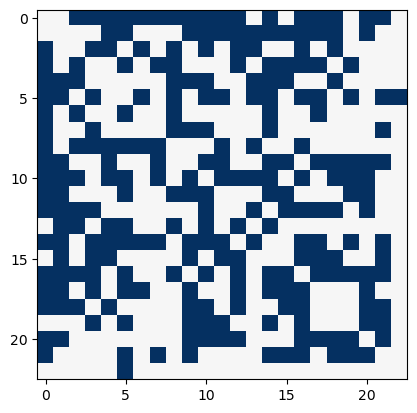

In [ ]:
plt.imshow(dediff_mat_signal > 0, cmap='RdBu', interpolation='none', vmin=-1, vmax=1)

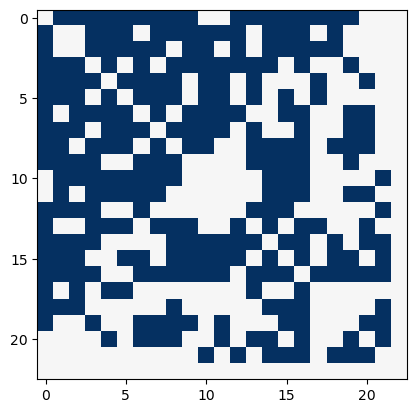

In [ ]:
plt.imshow(lorejuv_mat_signal > 0, cmap='RdBu', interpolation='none', vmin=-1, vmax=1)

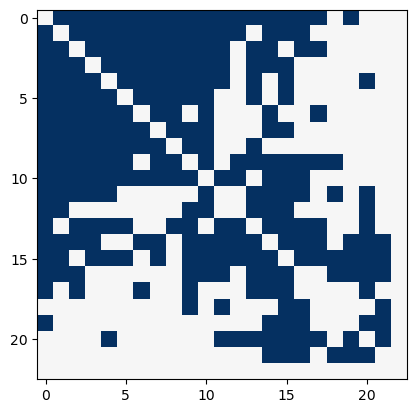

In [ ]:
plt.imshow(hirejuv_mat_signal > 0, cmap='RdBu', interpolation='none', vmin=-1, vmax=1)

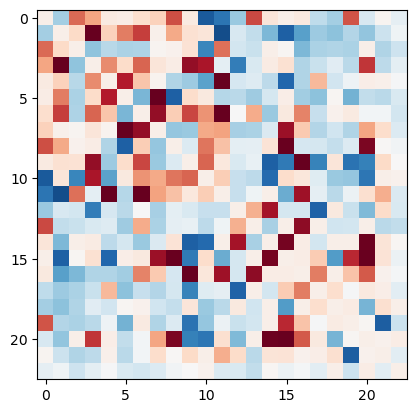

In [ ]:
plt.imshow(dediff_mat_signal - ref_mat_signal, cmap='RdBu', interpolation='none', vmin=-1, vmax=1)

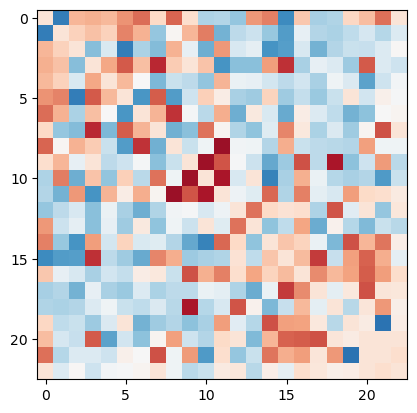

In [ ]:
plt.imshow(lorejuv_mat_signal - ref_mat_signal, cmap='RdBu', interpolation='none', vmin=-1, vmax=1)

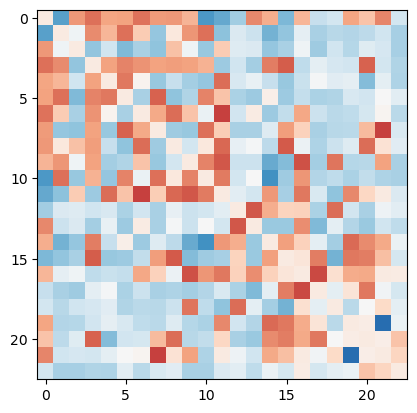

In [ ]:
plt.imshow(hirejuv_mat_signal - ref_mat_signal, cmap='RdBu', interpolation='none', vmin=-1, vmax=1)

In [ ]:
ref_mat_mask = ref_mat_signal  > ref_mat.std()
dediff_mat_mask = dediff_mat_signal > ref_mat.std() #dediff_mat.std()
lorejuv_mat_mask = lorejuv_mat_signal > ref_mat.std() #lorejuv_mat.std()
hirejuv_mat_mask = hirejuv_mat_signal > ref_mat.std() #hirejuv_mat.std()

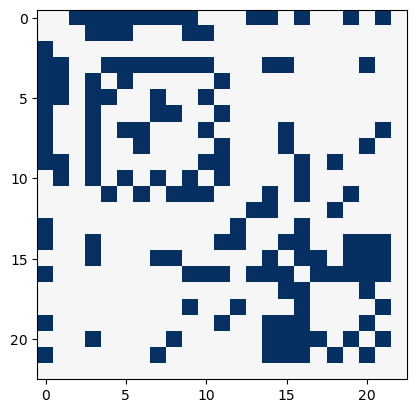

In [ ]:
plt.imshow(ref_mat_mask, cmap='RdBu', interpolation='none', vmin=-1, vmax=1)

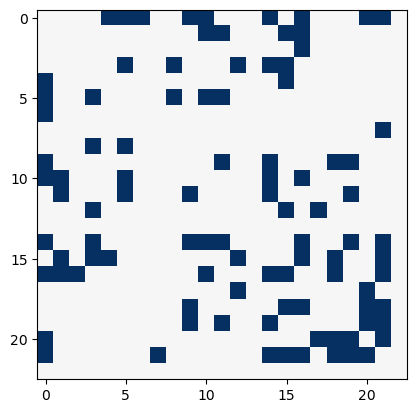

In [ ]:
plt.imshow(dediff_mat_mask, cmap='RdBu', interpolation='none', vmin=-1, vmax=1)

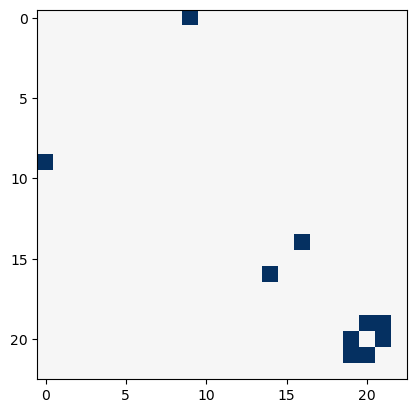

In [ ]:
plt.imshow(lorejuv_mat_mask, cmap='RdBu', interpolation='none', vmin=-1, vmax=1)

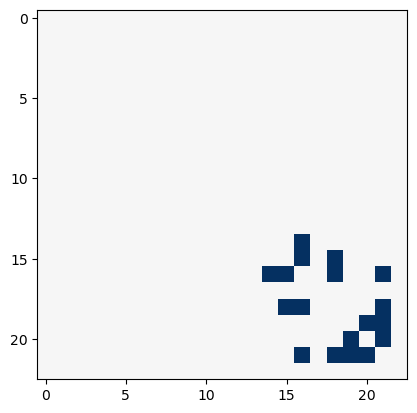

In [ ]:
plt.imshow(hirejuv_mat_mask, cmap='RdBu', interpolation='none', vmin=-1, vmax=1)

Global mean: 0.42995951730200643
Global std: 0.2883176049820118


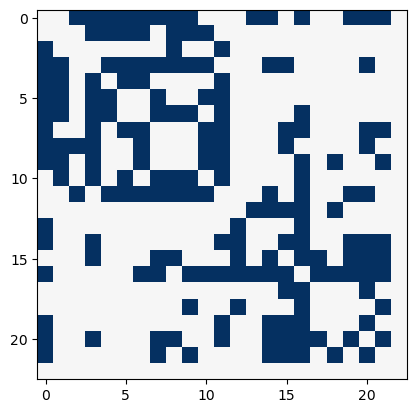

In [ ]:
# Calculate the global mean and standard deviation across all values in ref_mat, dediff_mat, lorejuv_mat, and hirejuv_mat
all_matrices = [ref_mat, dediff_mat, lorejuv_mat, hirejuv_mat]
all_values = np.concatenate([mat[np.isfinite(mat)].flatten() for mat in all_matrices])

# global_mean = np.mean(all_values)
# global_std = np.std(all_values)

global_mean = np.median(all_values)
global_std = np.std(all_values)

print("Global mean:", global_mean)
print("Global std:", global_std)

ref_mat_signal_global = ref_mat - global_mean
dediff_mat_signal_global = dediff_mat - global_mean
lorejuv_mat_signal_global = lorejuv_mat - global_mean
hirejuv_mat_signal_global = hirejuv_mat - global_mean

plt.imshow(ref_mat_signal_global > 0, cmap='RdBu', interpolation='none', vmin=-1, vmax=1)

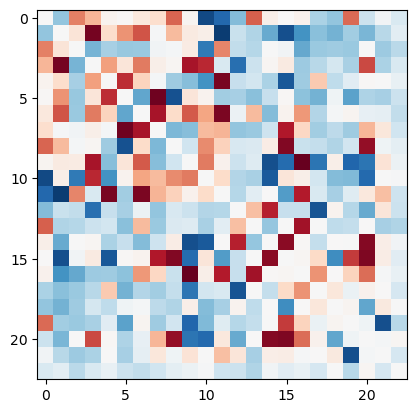

In [ ]:
plt.imshow(dediff_mat_signal_global - ref_mat_signal_global, cmap='RdBu', interpolation='none', vmin=-1, vmax=1)

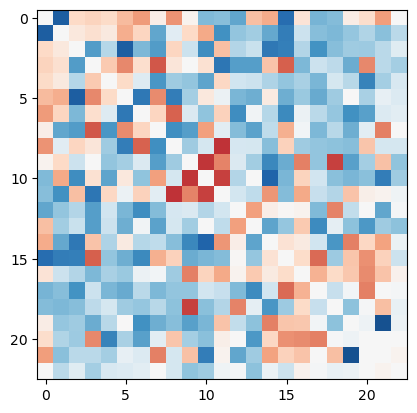

In [ ]:
plt.imshow(lorejuv_mat_signal_global - ref_mat_signal_global, cmap='RdBu', interpolation='none', vmin=-1, vmax=1)

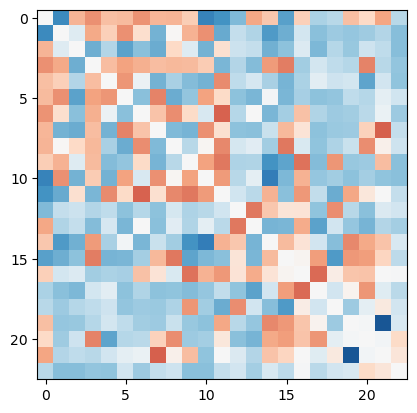

In [ ]:
plt.imshow(hirejuv_mat_signal_global - ref_mat_signal_global, cmap='RdBu', interpolation='none', vmin=-1, vmax=1)

In [ ]:
mask_compare = abs(hirejuv_mat - ref_mat) > 1.8*global_std

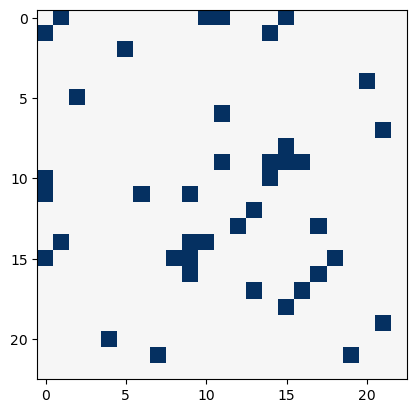

In [ ]:
plt.imshow(mask_compare, cmap='RdBu', interpolation='none', vmin=-1, vmax=1)

In [ ]:
ref_mat.shape, dediff_mat.shape, lorejuv_mat.shape, hirejuv_mat.shape

((23, 23), (23, 23), (23, 23), (23, 23))

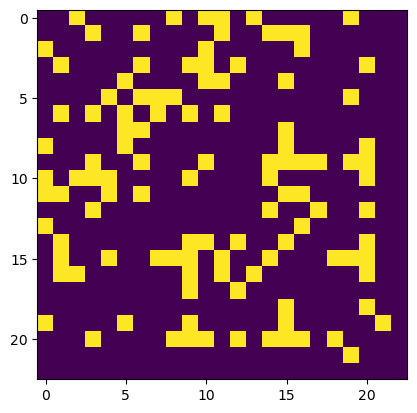

In [ ]:
dediff_DE = abs(dediff_mat - ref_mat) > 0.5

plt.imshow(dediff_DE)

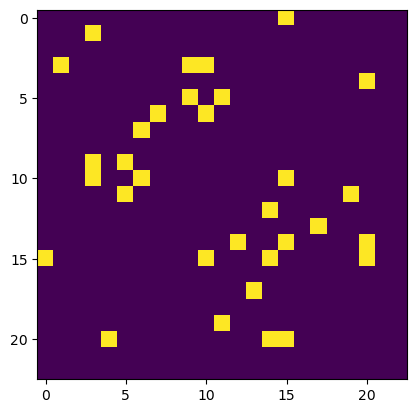

In [ ]:
hirejuv_DE = abs(hirejuv_mat - dediff_mat) > 0.5

plt.imshow(hirejuv_DE)

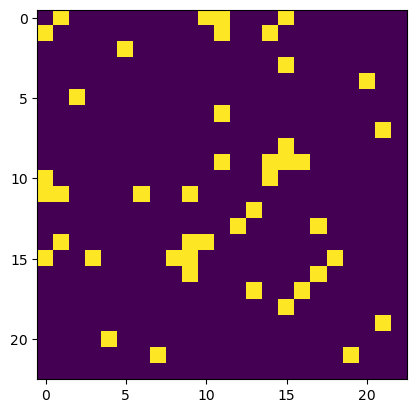

In [ ]:
hirejuv_ref_DE = abs(hirejuv_mat - ref_mat) > 0.5

plt.imshow(hirejuv_ref_DE)

{0: 387, 1: 38, 2: 26, 3: 6, 4: 72}


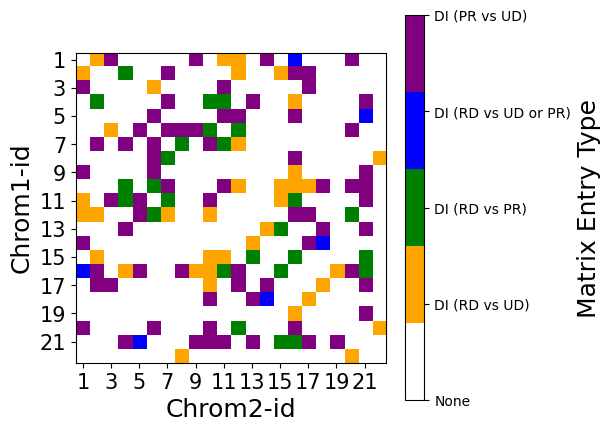

In [ ]:
# Create a matrix to represent the conditions
matrix_visualization = np.zeros_like(hirejuv_ref_DE, dtype=int)

# Set entries positive only in hirejuv_ref_DE to 1 (blue)
matrix_visualization[(hirejuv_ref_DE) & (~hirejuv_DE)] = 1

# Set entries positive only in hirejuv_DE to 2 (red)
matrix_visualization[(hirejuv_DE) & (~hirejuv_ref_DE)] = 2

matrix_visualization[(hirejuv_ref_DE) & (hirejuv_DE)] = 3  # Both conditions are true


matrix_visualization[(dediff_DE) & (~hirejuv_ref_DE) & (~hirejuv_DE)] = 4  # Only dediff_DE is true


# Count unique values in matrix_visualization
unique_values, counts = np.unique(matrix_visualization, return_counts=True)
print(dict(zip(unique_values, counts)))
# Define a list of colors for the matrix visualization
colors = ['white', 'orange', 'green', 'blue', 'purple']
cmap = plt.cm.colors.ListedColormap(colors[:5])  # Use only the first 5 colors
# Plot the matrix
plt.figure(figsize=(5, 5))
plt.imshow(matrix_visualization[:22,:22], cmap=cmap, interpolation='none')
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4])
cbar.ax.set_yticklabels(['None', 'DI (RD vs UD)', 'DI (RD vs PR)', 'DI (RD vs UD or PR)', 'DI (PR vs UD)'])
cbar.set_label('Matrix Entry Type', fontsize=18)
plt.xlabel('Chrom2-id', fontsize=18)
plt.ylabel('Chrom1-id', fontsize=18)

plt.xticks(ticks=np.arange(0,22,2), labels=np.arange(1, 23,2),fontsize=15)
plt.yticks(ticks=np.arange(0,22,2), labels=np.arange(1, 23,2), fontsize=15)
# plt.title('Matrix Visualization', fontsize=16)
plt.show()

In [ ]:
# Extract tuples for entries with value 1
value_1_tuples = [(i, j) for i in range(matrix_visualization.shape[0]) 
                  for j in range(matrix_visualization.shape[1]) if matrix_visualization[i, j] == 1]

# Extract tuples for entries with value 2
value_2_tuples = [(i, j) for i in range(matrix_visualization.shape[0]) 
                  for j in range(matrix_visualization.shape[1]) if matrix_visualization[i, j] == 2]

# Extract tuples for entries with value 3
value_3_tuples = [(i, j) for i in range(matrix_visualization.shape[0]) 
                  for j in range(matrix_visualization.shape[1]) if matrix_visualization[i, j] == 3]

# Extract tuples for entries with value 4
value_4_tuples = [(i, j) for i in range(matrix_visualization.shape[0]) 
                  for j in range(matrix_visualization.shape[1]) if matrix_visualization[i, j] == 4]

# Print the results
print("Value 1 tuples:", value_1_tuples)
print("Value 2 tuples:", value_2_tuples)
print("Value 3 tuples:", value_3_tuples)
print("Value 4 tuples:", value_4_tuples)

Value 1 tuples: [(0, 1), (0, 10), (0, 11), (1, 0), (1, 11), (1, 14), (2, 5), (3, 15), (5, 2), (6, 11), (7, 21), (8, 15), (9, 11), (9, 14), (9, 15), (9, 16), (10, 0), (10, 14), (11, 0), (11, 1), (11, 6), (11, 9), (12, 13), (13, 12), (14, 1), (14, 9), (14, 10), (15, 3), (15, 8), (15, 9), (15, 18), (16, 9), (16, 17), (17, 16), (18, 15), (19, 21), (21, 7), (21, 19)]
Value 2 tuples: [(1, 3), (3, 1), (3, 9), (3, 10), (5, 9), (5, 11), (6, 7), (6, 10), (7, 6), (9, 3), (9, 5), (10, 3), (10, 6), (10, 15), (11, 5), (11, 19), (12, 14), (14, 12), (14, 15), (14, 20), (15, 10), (15, 14), (15, 20), (19, 11), (20, 14), (20, 15)]
Value 3 tuples: [(0, 15), (4, 20), (13, 17), (15, 0), (17, 13), (20, 4)]
Value 4 tuples: [(0, 2), (0, 8), (0, 13), (0, 19), (1, 6), (1, 15), (1, 16), (2, 0), (2, 10), (2, 16), (3, 6), (3, 12), (3, 20), (4, 5), (4, 10), (4, 11), (4, 15), (5, 4), (5, 6), (5, 7), (5, 8), (5, 19), (6, 1), (6, 3), (6, 5), (6, 9), (7, 5), (7, 15), (8, 0), (8, 5), (8, 20), (9, 6), (9, 10), (9, 17), (9

In [ ]:
import pickle as pkl

pkl.dump(value_1_tuples, open("RD_vs_UD.pkl", "wb"))
pkl.dump(value_2_tuples, open("RD_vs_PR.pkl", "wb"))
pkl.dump(value_3_tuples, open("RD_vs_UD_or_PR.pkl", "wb"))
pkl.dump(value_4_tuples, open("PR_vs_UD.pkl", "wb"))

In [ ]:
# Calculate thresholds for ref_mat
ref_mean = np.mean(ref_mat)
ref_std = np.std(ref_mat)
ref_upper_threshold = ref_mean + 0.5 * ref_std
ref_lower_threshold = ref_mean - 0.5 * ref_std

print(np.where(ref_mat > ref_upper_threshold))
print(zip(*np.where(ref_mat > ref_upper_threshold)))
# print(set(zip(*np.where(ref_mat > ref_upper_threshold))))
# Classify indices in ref_mat
ref_indices_class1 = {(i, j) for i, j in np.argwhere(ref_mat > ref_upper_threshold)}  # Class 1: Above upper threshold
ref_indices_class2 = {(i, j) for i, j in np.argwhere(ref_mat < ref_lower_threshold)}  # Class 2: Below lower threshold
ref_indices_class3 = {(i, j) for i, j in np.argwhere((ref_mat <= ref_upper_threshold) & (ref_mat >= ref_lower_threshold))}  # Class 3: Within range

# Function to find differing indices
def find_differing_indices(matrix, ref_class1, ref_class2, ref_class3, upper_threshold, lower_threshold):
    mat_indices_class1 = {(i, j) for i, j in np.argwhere(matrix > upper_threshold)} # Class 1: Above upper threshold
    mat_indices_class2 = {(i, j) for i, j in np.argwhere(matrix < lower_threshold)} # Class 2: Below lower threshold
    mat_indices_class3 = {(i, j) for i, j in np.argwhere((matrix <= upper_threshold) & (matrix >= lower_threshold))} # Class 3: Within range

    # differing_indices = (mat_indices_class1 - ref_class1) | (mat_indices_class2 - ref_class2) | (mat_indices_class3 - ref_class3)
    differing_indices = (ref_class1 & mat_indices_class3) | (ref_class3 & mat_indices_class1)
    return list(differing_indices)

# Calculate thresholds for other matrices
dediff_upper_threshold = np.mean(dediff_mat) + 0.5 * np.std(dediff_mat)
dediff_lower_threshold = np.mean(dediff_mat) - 0.5 * np.std(dediff_mat)
lorejuv_upper_threshold = np.mean(lorejuv_mat) + 0.5 * np.std(lorejuv_mat)
lorejuv_lower_threshold = np.mean(lorejuv_mat) - 0.5 * np.std(lorejuv_mat)
hirejuv_upper_threshold = np.mean(hirejuv_mat) + 0.5 * np.std(hirejuv_mat)
hirejuv_lower_threshold = np.mean(hirejuv_mat) - 0.5 * np.std(hirejuv_mat)

# Find differing indices
dediff_differing_indices = find_differing_indices(dediff_mat, ref_indices_class1, ref_indices_class2, ref_indices_class3, dediff_upper_threshold, dediff_lower_threshold)
lorejuv_differing_indices = find_differing_indices(lorejuv_mat, ref_indices_class1, ref_indices_class2, ref_indices_class3, lorejuv_upper_threshold, lorejuv_lower_threshold)
hirejuv_differing_indices = find_differing_indices(hirejuv_mat, ref_indices_class1, ref_indices_class2, ref_indices_class3, hirejuv_upper_threshold, hirejuv_lower_threshold)

# Store the results
print("Dediff differing indices:", dediff_differing_indices)
print("Lorejuv differing indices:", lorejuv_differing_indices)
print("Hirejuv differing indices:", hirejuv_differing_indices)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12,
       12, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21]), array([ 2,  3,  4,  5,  6,  7,  8,  9, 13, 14, 16, 19, 20, 21,  3,  4,  5,
        6,  9, 10,  0,  8, 11,  0,  1,  4,  5,  6,  7,  8,  9, 10, 14, 15,
       20,  0,  1,  3,  5, 11,  0,  1,  3,  4,  7, 10, 11,  0,  1,  3,  7,
        8,  9, 11, 16,

In [ ]:
import pickle as pkl

list(ref_indices_class1)

pkl.dump(list(ref_indices_class1), open("ref_indices_class1.pkl", "wb"))
pkl.dump(dediff_differing_indices, open("dediff_differing_indices.pkl", "wb"))
pkl.dump(lorejuv_differing_indices, open("lorejuv_differing_indices.pkl", "wb"))
pkl.dump(hirejuv_differing_indices, open("hirejuv_differing_indices.pkl", "wb"))